# Ejercicio 1

# Imports

In [114]:
#Importar librerías necesarias para desarrollar el análisis
import importlib

import pandas as pd
import numpy as np
import sklearn 
from sklearn.metrics import mean_squared_error, auc, log_loss, roc_auc_score, accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score, make_scorer
import random as python_random
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.stats import ks_2samp
import scorecardpy as sc
#import openpyxl

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.feature_selection import SelectKBest, chi2, RFE, mutual_info_classif
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline, Pipeline 
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc, log_loss, roc_auc_score, accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score, make_scorer

from sklearn.model_selection import KFold, ShuffleSplit, LeaveOneOut, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

from xgboost import XGBClassifier
from xgboost import XGBRegressor
import xgboost

import sys
import notebook
import jupyterlab

import os
from pathlib import Path

In [115]:
from dotenv import load_dotenv, find_dotenv
# Carga el .env más cercano hacia arriba en el árbol
load_dotenv(find_dotenv())

# Raíz del proyecto = carpeta que contiene el .env
PROJECT_ROOT = Path(find_dotenv()).parent

# DATA_PATH puede ser relativo (./data) o absoluto; aquí lo resolvemos desde el root
DATA_PATH = (PROJECT_ROOT / os.environ.get("DATA_PATH", "data")).resolve()

In [116]:
import sys, platform
print(sys.executable)
print(platform.python_version())

/Users/cristian/Documents/GitHub/adeslas-interview/.venv/bin/python
3.13.7


In [117]:
pd.set_option("display.max_columns", None)   # muestra todas las columnas
pd.set_option("display.width", 0)            # usa el ancho de la celda de Jupyter
pd.set_option("display.max_colwidth", None)  # no truncar el contenido de celdas

# Env

In [118]:
var_target = 'anula'

PROJ_ROOT = Path.cwd().parent 
sys.path.insert(0, str(PROJ_ROOT / "src"))
print("Añadido a sys.path:", sys.path[0])

import utils.data_cleaning as dc
from utils.outlier_summary import summarize_numeric_features
#importlib.reload(dc)

Añadido a sys.path: /Users/cristian/Documents/GitHub/adeslas-interview/src


# Funciones

# Load data

In [119]:
DATA_PATH = Path(os.environ["DATA_PATH"])

In [120]:
# Anulaciones
file_tab = DATA_PATH / "BBDD_anulaciones.tab"
df_anulaciones = pd.read_csv(file_tab, sep="\t", encoding="latin1")
print(df_anulaciones.shape)
df_anulaciones.head()


(50000, 21)


,id_poliza,anula,edad_cliente,cia_procedencia,antig_cliente,garantia_ampliada,canal_entrada,prima,profesion,VC,antiguedad_vehiculo,pvp_vehiculo,siniestros_ultimo_anyo,Polizas_AUTO,Importe_siniestros,admite_publi,id_agente_gestor,tipo_pago,CV_coche,Gestion_multas,codigo_zona
0,1,0,27.4,Ocaso,0.00,Vehiculo sustitucion,NaN,90.30,Transporte de mercan,NaN,4,10457.084954,0,0,0.000000,Si,24,Mensual,47.0,N,483.0
1,2,0,24.9,Mutua Madrileña,4.49,Vehiculo sustitucion,Oficina Adeslas,194.06,Transporte de mercan,NaN,5,12078.987975,1,0,268.834435,Si,21,Anual,61.0,N,832.0
2,3,0,37.4,Liberty,0.00,Vehiculo sustitucion,Oficina Adeslas,186.04,Desconocido,NaN,10,7049.969489,1,1,2.504393,.,17,Mensual,112.0,N,256.0
3,4,0,19.8,Mutua Madrileña,8.45,Vehiculo sustitucion,Telefonico,128.71,Logistica,NaN,7,7097.456241,1,3,60.670131,.,90,Anual,104.0,N,627.0
4,5,0,35.6,Ocaso,NaN,Vehiculo sustitucion,Telefonico,357.16,Estudiante,NaN,5,24563.357655,0,3,0.000000,No,72,Anual,NaN,N,654.0


In [121]:
# Sociodemográfica
file_tab = DATA_PATH / "BBDD_extra.tab"
df_sociodemo= pd.read_csv(file_tab, sep="\t", encoding="latin1")

print(df_sociodemo.shape)
df_sociodemo.head()

(297, 400)


,codigo_zona,NUM_FAMILIAS,NUM_PERSONAS,NUM_PERSONAS_POR_FAMILIA,CAPITAL_PROVINCIA,TAMANO_MUNICIPIO,SUPERFICIE,DENSIDAD_POBLACION,ROOMMATES_PCT,ROOMMATES_TOTAL,SINGLE_JOVEN_PCT,SINGLE_JOVEN_TOTAL,SINGLE_ADULTO_PCT,SINGLE_ADULTO_TOTAL,PAREJA_JOVEN_PCT,PAREJA_JOVEN_TOTAL,PAREJA_ADULTA_PCT,PAREJA_ADULTA_TOTAL,FAMILIA_MONOPARENTAL_PCT,FAMILIA_MONOPARENTAL_TOTAL,NIDO_LLENO_PEQ_PCT,NIDO_LLENO_PEQ_TOTAL,NIDO_LLENO_JOV_PCT,NIDO_LLENO_JOV_TOTAL,NIDO_LLENO_MIX_PCT,NIDO_LLENO_MIX_TOTAL,NIDO_MULTINUCLEAR_PCT,NIDO_MULTINUCLEAR_TOTAL,ABUELOS_PCT,ABUELOS_TOTAL,JUBILADO_PCT,JUBILADO_TOTAL,PAREJA_JUBILADOS_PCT,PAREJA_JUBILADOS_TOTAL,INGRESOS_MES_NETOS_FAM,INGRESOS_ANUAL_NETOS_FAM,INGRESOS_MES_NETOS_PERS,INGRESOS_ANUAL_NETOS_PERS,INGRESOS_MES_FAM_ACTIVAS,ING_FAM_ACTIVAS_POR_OCUPADO,ING_FAM_ACTIVAS_POR_MIEMBRO,INGRESOS_MES_FAM_JUBILADOS,PCT_FAM_ING_INFERIOR_A_1389,PCT_FAM_ING_ENTRE_1389_Y_1641,PCT_FAM_ING_ENTRE_1641_Y_2122,PCT_FAM_ING_ENTRE_2122_Y_2589,PCT_FAM_ING_SUPERIOR_A_2589,INGRESOS_NETOS_MES_P5,INGRESOS_NETOS_MES_P10,INGRESOS_NETOS_MES_P15,INGRESOS_NETOS_MES_P20,INGRESOS_NETOS_MES_P25,INGRESOS_NETOS_MES_P30,INGRESOS_NETOS_MES_P35,INGRESOS_NETOS_MES_P40,INGRESOS_NETOS_MES_P45,INGRESOS_NETOS_MES_P50,INGRESOS_NETOS_MES_P55,INGRESOS_NETOS_MES_P60,INGRESOS_NETOS_MES_P65,INGRESOS_NETOS_MES_P70,INGRESOS_NETOS_MES_P75,INGRESOS_NETOS_MES_P80,INGRESOS_NETOS_MES_P85,INGRESOS_NETOS_MES_P90,INGRESOS_NETOS_MES_P95,RENTA_BRUTA_HOGAR,RENTA_DISP_HOGAR,RENTA_DISP_HOGAR_INCL_PREST,RENTA_DISP_HOGAR_INCL_ALQ,RENTA_DISP_HOGAR_INCL_PENS_PRIV,RENTA_NETA_ALQUILER_PROPIEDAD,RENTA_BRUTA_ALQUILER_PROPIEDAD,RENTA_NETA_MENORES_16,RENTA_BRUTA_MENORES_16,CUOTA_HIPOTECA_MES,IMPUESTO_SOBRE_PATRIMONIO,AYUDA_NETA_FAMILIA_E_HIJOS,AYUDA_BRUTA_FAMILIA_E_HIJOS,AYUDA_NETA_VIVIENDA,INGRESOS_NETOS_ASIST_SOCIAL,INGRESOS_BRUTOS_ASIST_SOCIAL,TRANSF_PERC_OH_NETAS,TRANSF_PERC_OH_PENSION,TRANSF_ABON_OH_NETAS,TRANSF_ABON_OH_BRUTAS,TRANSF_ABON_OH_PENSION,TRANSF_ABON_OH_PENS_BRUTAS,INT_DIV_Y_GANANCIAS_NETAS,INT_DIV_Y_GANANCIAS_BRUTAS,INT_PAGADOS_PRESTAMO_NETOS,TOTAL_GASTOS_FAMILIARES,TOTAL_VIVIENDA_Y_SUMINISTROS,TOTAL_ALQULERES_VIVIENDA,TOTAL_ALQUILERES_VIV_PPAL,TOTAL_OTROS_ALQUILERES,OTROS_ALQUILERES_NO_VAC_O_ENSEN,OTROS_ALQ_ENSENANZA,ALQUILERES_GARAJE_VIV_PPAL,ALQUILERES_GARAJE_OTRAS_VIV,OTROS_ALQUILERES,TOTAL_ALQ_IMPUT_VIVIENDA,TOTAL_ALQ_IMPUT_VIV_PPAL,TOTAL_OTROS_ALQ_IMPUT,ALQ_IMPUT_OTRAS_VIV,ALQ_IMPUT_VIV_PPAL_CEDIDA,ALQ_IMPUT_OTRAS_VIV_CEDIDAS,TOTAL_GASTOS_MANT_Y_REP_VIV,MATERIALES_MANT_Y_REP_VIV,TOTAL_SERV_MANT_Y_REP_VIV,SERV_FONTANERIA,SERV_ELECTRICIDAD,SERV_MANT_SIST_CALEFACCION,SERV_PINTURA,SERV_CARPINTERIA,SERV_ALBANILERIA,SERV_SUMINISTROS_AGUA_Y_OTROS,TOTAL_SUMINISTRO_AGUA,SUMINISTRO_AGUA_VIV_PPAL,SUMINISTRO_AGUA_OTRAS_VIV,TOTAL_SERV_RECOGIDA_BASURA,SERV_REC_BASURA_VIV_PPAL,SERV_REC_BASURA_OTRAS_VIV,TOTAL_SERV_SANEAMIENTO,SERV_SANEAMIENTO_VIV_PPAL,SERV_SANEAMIENTO_OTRAS_VIV,TOTAL_OTROS_SERV_REL_VIV,GASTOS_COMUNITARIOS_VIV_PPAL,GASTOS_COMUNITARIOS_OTRAS_VIV,SERV_SEGURIDAD_VIV_PPAL,SERV_SEGURIDAD_OTRAS_VIV,OTROS_SERV_REL_VIV_PPAL,OTROS_SERV_REL_OTRAS_VIV,TOTAL_ELECTR_GAS_Y_OTROS_COMB,TOTAL_ELECTRICIDAD,ELECTRICIDAD_VIV_PPAL,ELECTRICIDAD_OTRAS_VIV,TOTAL_GAS,GAS_CIUDAD_Y_NATURAL_VIV_PPAL,GAS_CIUDAD_Y_NATURAL_OTRAS_VIV,GAS_LICUADO_VIV_PPAL,GAS_LICUADO_OTRAS_VIV,TOTAL_COMBUSTIBLES_LIQUIDOS,COMBUSTIBLES_LIQUIDOS_VIV_PPAL,COMBUSTIBLES_LIQUIDOS_OTRAS_VIV,TOTAL_COMBUSTIBLE_SOLIDOS,CARBON_VIV_PPAL,CARBON_OTRAS_VIV,OTROS_COMB_SOLIDOS_VIV_PPAL,OTROS_COMB_SOLIDOS_OTRAS_VIV,TOTAL_SALUD,TOTAL_PROD_FARMA_Y_APARAT_TERAP,TOTAL_PROD_FARMACEUTICOS,PRODUCTOS_FARMACEUTICOS,PRODUCTOS_HOMEOPATICOS,TOTAL_OTROS_PROD_MEDICOS,PRUEBA_EMBARAZO_Y_ANTICONCEP,OTROS_PRODUCTOS_MEDICOS,TOTAL_OTROS_APARAT_Y_MAT_TERAP,GAFAS_GRAD_Y_LENTES_CONTACTO,AUDIFONOS,REPARACION_APARAT_Y_MAT_TERAP,OTROS_APARAT_Y_MAT_TERAP,TOTAL_SERV_MEDIC_Y_PARAMED_AMBU,TOTAL_SERV_MEDIC_AMBULAT,MED_GENERAL_Y_PEDIATRIA_AMBU,MED_ESPECIALISTA_AMBU,TOTAL_SERV_DENTALES,TOTAL_SERV_PARAMEDIC_AMBU,SERV_ANAL_CLINIC_Y_DIAGNOS,SERV_REHABILIT_ALQ_EQUIPO_TER

In [122]:
## Causas anulaciones - GenAI
#file_tab = DATA_PATH / "BBDD_CAUSAS_SINIESTROS_TRAIN.csv"
#df_causas_siniestros = pd.read_csv(file_tab, sep=";", encoding="latin1")
#df_causas_siniestros.head()

# EDA inicial

## EDA-Sociodemografica

In [123]:
#Número de filas y columnas
print("\ndimensiones: ",df_sociodemo.shape)

#Visualización inicial
display(df_sociodemo.head())

#Descripción básica
display(df_sociodemo.describe())
display(df_sociodemo.dtypes)

# Seleccionar columnas numéricas
numeric_columns = df_sociodemo.select_dtypes(include=['number']).columns.tolist()
print("\nColumnas numéricas:")
display(numeric_columns)

# Seleccionar columnas no numéricas
non_numeric_columns = df_sociodemo.select_dtypes(exclude=['number']).columns.tolist()
print("\nColumnas no numéricas:")
display(non_numeric_columns)




dimensiones:  (297, 400)


,codigo_zona,NUM_FAMILIAS,NUM_PERSONAS,NUM_PERSONAS_POR_FAMILIA,CAPITAL_PROVINCIA,TAMANO_MUNICIPIO,SUPERFICIE,DENSIDAD_POBLACION,ROOMMATES_PCT,ROOMMATES_TOTAL,SINGLE_JOVEN_PCT,SINGLE_JOVEN_TOTAL,SINGLE_ADULTO_PCT,SINGLE_ADULTO_TOTAL,PAREJA_JOVEN_PCT,PAREJA_JOVEN_TOTAL,PAREJA_ADULTA_PCT,PAREJA_ADULTA_TOTAL,FAMILIA_MONOPARENTAL_PCT,FAMILIA_MONOPARENTAL_TOTAL,NIDO_LLENO_PEQ_PCT,NIDO_LLENO_PEQ_TOTAL,NIDO_LLENO_JOV_PCT,NIDO_LLENO_JOV_TOTAL,NIDO_LLENO_MIX_PCT,NIDO_LLENO_MIX_TOTAL,NIDO_MULTINUCLEAR_PCT,NIDO_MULTINUCLEAR_TOTAL,ABUELOS_PCT,ABUELOS_TOTAL,JUBILADO_PCT,JUBILADO_TOTAL,PAREJA_JUBILADOS_PCT,PAREJA_JUBILADOS_TOTAL,INGRESOS_MES_NETOS_FAM,INGRESOS_ANUAL_NETOS_FAM,INGRESOS_MES_NETOS_PERS,INGRESOS_ANUAL_NETOS_PERS,INGRESOS_MES_FAM_ACTIVAS,ING_FAM_ACTIVAS_POR_OCUPADO,ING_FAM_ACTIVAS_POR_MIEMBRO,INGRESOS_MES_FAM_JUBILADOS,PCT_FAM_ING_INFERIOR_A_1389,PCT_FAM_ING_ENTRE_1389_Y_1641,PCT_FAM_ING_ENTRE_1641_Y_2122,PCT_FAM_ING_ENTRE_2122_Y_2589,PCT_FAM_ING_SUPERIOR_A_2589,INGRESOS_NETOS_MES_P5,INGRESOS_NETOS_MES_P10,INGRESOS_NETOS_MES_P15,INGRESOS_NETOS_MES_P20,INGRESOS_NETOS_MES_P25,INGRESOS_NETOS_MES_P30,INGRESOS_NETOS_MES_P35,INGRESOS_NETOS_MES_P40,INGRESOS_NETOS_MES_P45,INGRESOS_NETOS_MES_P50,INGRESOS_NETOS_MES_P55,INGRESOS_NETOS_MES_P60,INGRESOS_NETOS_MES_P65,INGRESOS_NETOS_MES_P70,INGRESOS_NETOS_MES_P75,INGRESOS_NETOS_MES_P80,INGRESOS_NETOS_MES_P85,INGRESOS_NETOS_MES_P90,INGRESOS_NETOS_MES_P95,RENTA_BRUTA_HOGAR,RENTA_DISP_HOGAR,RENTA_DISP_HOGAR_INCL_PREST,RENTA_DISP_HOGAR_INCL_ALQ,RENTA_DISP_HOGAR_INCL_PENS_PRIV,RENTA_NETA_ALQUILER_PROPIEDAD,RENTA_BRUTA_ALQUILER_PROPIEDAD,RENTA_NETA_MENORES_16,RENTA_BRUTA_MENORES_16,CUOTA_HIPOTECA_MES,IMPUESTO_SOBRE_PATRIMONIO,AYUDA_NETA_FAMILIA_E_HIJOS,AYUDA_BRUTA_FAMILIA_E_HIJOS,AYUDA_NETA_VIVIENDA,INGRESOS_NETOS_ASIST_SOCIAL,INGRESOS_BRUTOS_ASIST_SOCIAL,TRANSF_PERC_OH_NETAS,TRANSF_PERC_OH_PENSION,TRANSF_ABON_OH_NETAS,TRANSF_ABON_OH_BRUTAS,TRANSF_ABON_OH_PENSION,TRANSF_ABON_OH_PENS_BRUTAS,INT_DIV_Y_GANANCIAS_NETAS,INT_DIV_Y_GANANCIAS_BRUTAS,INT_PAGADOS_PRESTAMO_NETOS,TOTAL_GASTOS_FAMILIARES,TOTAL_VIVIENDA_Y_SUMINISTROS,TOTAL_ALQULERES_VIVIENDA,TOTAL_ALQUILERES_VIV_PPAL,TOTAL_OTROS_ALQUILERES,OTROS_ALQUILERES_NO_VAC_O_ENSEN,OTROS_ALQ_ENSENANZA,ALQUILERES_GARAJE_VIV_PPAL,ALQUILERES_GARAJE_OTRAS_VIV,OTROS_ALQUILERES,TOTAL_ALQ_IMPUT_VIVIENDA,TOTAL_ALQ_IMPUT_VIV_PPAL,TOTAL_OTROS_ALQ_IMPUT,ALQ_IMPUT_OTRAS_VIV,ALQ_IMPUT_VIV_PPAL_CEDIDA,ALQ_IMPUT_OTRAS_VIV_CEDIDAS,TOTAL_GASTOS_MANT_Y_REP_VIV,MATERIALES_MANT_Y_REP_VIV,TOTAL_SERV_MANT_Y_REP_VIV,SERV_FONTANERIA,SERV_ELECTRICIDAD,SERV_MANT_SIST_CALEFACCION,SERV_PINTURA,SERV_CARPINTERIA,SERV_ALBANILERIA,SERV_SUMINISTROS_AGUA_Y_OTROS,TOTAL_SUMINISTRO_AGUA,SUMINISTRO_AGUA_VIV_PPAL,SUMINISTRO_AGUA_OTRAS_VIV,TOTAL_SERV_RECOGIDA_BASURA,SERV_REC_BASURA_VIV_PPAL,SERV_REC_BASURA_OTRAS_VIV,TOTAL_SERV_SANEAMIENTO,SERV_SANEAMIENTO_VIV_PPAL,SERV_SANEAMIENTO_OTRAS_VIV,TOTAL_OTROS_SERV_REL_VIV,GASTOS_COMUNITARIOS_VIV_PPAL,GASTOS_COMUNITARIOS_OTRAS_VIV,SERV_SEGURIDAD_VIV_PPAL,SERV_SEGURIDAD_OTRAS_VIV,OTROS_SERV_REL_VIV_PPAL,OTROS_SERV_REL_OTRAS_VIV,TOTAL_ELECTR_GAS_Y_OTROS_COMB,TOTAL_ELECTRICIDAD,ELECTRICIDAD_VIV_PPAL,ELECTRICIDAD_OTRAS_VIV,TOTAL_GAS,GAS_CIUDAD_Y_NATURAL_VIV_PPAL,GAS_CIUDAD_Y_NATURAL_OTRAS_VIV,GAS_LICUADO_VIV_PPAL,GAS_LICUADO_OTRAS_VIV,TOTAL_COMBUSTIBLES_LIQUIDOS,COMBUSTIBLES_LIQUIDOS_VIV_PPAL,COMBUSTIBLES_LIQUIDOS_OTRAS_VIV,TOTAL_COMBUSTIBLE_SOLIDOS,CARBON_VIV_PPAL,CARBON_OTRAS_VIV,OTROS_COMB_SOLIDOS_VIV_PPAL,OTROS_COMB_SOLIDOS_OTRAS_VIV,TOTAL_SALUD,TOTAL_PROD_FARMA_Y_APARAT_TERAP,TOTAL_PROD_FARMACEUTICOS,PRODUCTOS_FARMACEUTICOS,PRODUCTOS_HOMEOPATICOS,TOTAL_OTROS_PROD_MEDICOS,PRUEBA_EMBARAZO_Y_ANTICONCEP,OTROS_PRODUCTOS_MEDICOS,TOTAL_OTROS_APARAT_Y_MAT_TERAP,GAFAS_GRAD_Y_LENTES_CONTACTO,AUDIFONOS,REPARACION_APARAT_Y_MAT_TERAP,OTROS_APARAT_Y_MAT_TERAP,TOTAL_SERV_MEDIC_Y_PARAMED_AMBU,TOTAL_SERV_MEDIC_AMBULAT,MED_GENERAL_Y_PEDIATRIA_AMBU,MED_ESPECIALISTA_AMBU,TOTAL_SERV_DENTALES,TOTAL_SERV_PARAMEDIC_AMBU,SERV_ANAL_CLINIC_Y_DIAGNOS,SERV_REHABILIT_ALQ_EQUIPO_TER

,codigo_zona,NUM_FAMILIAS,NUM_PERSONAS,NUM_PERSONAS_POR_FAMILIA,CAPITAL_PROVINCIA,TAMANO_MUNICIPIO,SUPERFICIE,DENSIDAD_POBLACION,ROOMMATES_PCT,ROOMMATES_TOTAL,SINGLE_JOVEN_PCT,SINGLE_JOVEN_TOTAL,SINGLE_ADULTO_PCT,SINGLE_ADULTO_TOTAL,PAREJA_JOVEN_PCT,PAREJA_JOVEN_TOTAL,PAREJA_ADULTA_PCT,PAREJA_ADULTA_TOTAL,FAMILIA_MONOPARENTAL_PCT,FAMILIA_MONOPARENTAL_TOTAL,NIDO_LLENO_PEQ_PCT,NIDO_LLENO_PEQ_TOTAL,NIDO_LLENO_JOV_PCT,NIDO_LLENO_JOV_TOTAL,NIDO_LLENO_MIX_PCT,NIDO_LLENO_MIX_TOTAL,NIDO_MULTINUCLEAR_PCT,NIDO_MULTINUCLEAR_TOTAL,ABUELOS_PCT,ABUELOS_TOTAL,JUBILADO_PCT,JUBILADO_TOTAL,PAREJA_JUBILADOS_PCT,PAREJA_JUBILADOS_TOTAL,INGRESOS_MES_NETOS_FAM,INGRESOS_ANUAL_NETOS_FAM,INGRESOS_MES_NETOS_PERS,INGRESOS_ANUAL_NETOS_PERS,INGRESOS_MES_FAM_ACTIVAS,ING_FAM_ACTIVAS_POR_OCUPADO,ING_FAM_ACTIVAS_POR_MIEMBRO,INGRESOS_MES_FAM_JUBILADOS,PCT_FAM_ING_INFERIOR_A_1389,PCT_FAM_ING_ENTRE_1389_Y_1641,PCT_FAM_ING_ENTRE_1641_Y_2122,PCT_FAM_ING_ENTRE_2122_Y_2589,PCT_FAM_ING_SUPERIOR_A_2589,INGRESOS_NETOS_MES_P5,INGRESOS_NETOS_MES_P10,INGRESOS_NETOS_MES_P15,INGRESOS_NETOS_MES_P20,INGRESOS_NETOS_MES_P25,INGRESOS_NETOS_MES_P30,INGRESOS_NETOS_MES_P35,INGRESOS_NETOS_MES_P40,INGRESOS_NETOS_MES_P45,INGRESOS_NETOS_MES_P50,INGRESOS_NETOS_MES_P55,INGRESOS_NETOS_MES_P60,INGRESOS_NETOS_MES_P65,INGRESOS_NETOS_MES_P70,INGRESOS_NETOS_MES_P75,INGRESOS_NETOS_MES_P80,INGRESOS_NETOS_MES_P85,INGRESOS_NETOS_MES_P90,INGRESOS_NETOS_MES_P95,RENTA_BRUTA_HOGAR,RENTA_DISP_HOGAR,RENTA_DISP_HOGAR_INCL_PREST,RENTA_DISP_HOGAR_INCL_ALQ,RENTA_DISP_HOGAR_INCL_PENS_PRIV,RENTA_NETA_ALQUILER_PROPIEDAD,RENTA_BRUTA_ALQUILER_PROPIEDAD,RENTA_NETA_MENORES_16,RENTA_BRUTA_MENORES_16,CUOTA_HIPOTECA_MES,IMPUESTO_SOBRE_PATRIMONIO,AYUDA_NETA_FAMILIA_E_HIJOS,AYUDA_BRUTA_FAMILIA_E_HIJOS,AYUDA_NETA_VIVIENDA,INGRESOS_NETOS_ASIST_SOCIAL,INGRESOS_BRUTOS_ASIST_SOCIAL,TRANSF_PERC_OH_NETAS,TRANSF_PERC_OH_PENSION,TRANSF_ABON_OH_NETAS,TRANSF_ABON_OH_BRUTAS,TRANSF_ABON_OH_PENSION,TRANSF_ABON_OH_PENS_BRUTAS,INT_DIV_Y_GANANCIAS_NETAS,INT_DIV_Y_GANANCIAS_BRUTAS,INT_PAGADOS_PRESTAMO_NETOS,TOTAL_GASTOS_FAMILIARES,TOTAL_VIVIENDA_Y_SUMINISTROS,TOTAL_ALQULERES_VIVIENDA,TOTAL_ALQUILERES_VIV_PPAL,TOTAL_OTROS_ALQUILERES,OTROS_ALQUILERES_NO_VAC_O_ENSEN,OTROS_ALQ_ENSENANZA,ALQUILERES_GARAJE_VIV_PPAL,ALQUILERES_GARAJE_OTRAS_VIV,OTROS_ALQUILERES,TOTAL_ALQ_IMPUT_VIVIENDA,TOTAL_ALQ_IMPUT_VIV_PPAL,TOTAL_OTROS_ALQ_IMPUT,ALQ_IMPUT_OTRAS_VIV,ALQ_IMPUT_VIV_PPAL_CEDIDA,ALQ_IMPUT_OTRAS_VIV_CEDIDAS,TOTAL_GASTOS_MANT_Y_REP_VIV,MATERIALES_MANT_Y_REP_VIV,TOTAL_SERV_MANT_Y_REP_VIV,SERV_FONTANERIA,SERV_ELECTRICIDAD,SERV_MANT_SIST_CALEFACCION,SERV_PINTURA,SERV_CARPINTERIA,SERV_ALBANILERIA,SERV_SUMINISTROS_AGUA_Y_OTROS,TOTAL_SUMINISTRO_AGUA,SUMINISTRO_AGUA_VIV_PPAL,SUMINISTRO_AGUA_OTRAS_VIV,TOTAL_SERV_RECOGIDA_BASURA,SERV_REC_BASURA_VIV_PPAL,SERV_REC_BASURA_OTRAS_VIV,TOTAL_SERV_SANEAMIENTO,SERV_SANEAMIENTO_VIV_PPAL,SERV_SANEAMIENTO_OTRAS_VIV,TOTAL_OTROS_SERV_REL_VIV,GASTOS_COMUNITARIOS_VIV_PPAL,GASTOS_COMUNITARIOS_OTRAS_VIV,SERV_SEGURIDAD_VIV_PPAL,SERV_SEGURIDAD_OTRAS_VIV,OTROS_SERV_REL_VIV_PPAL,OTROS_SERV_REL_OTRAS_VIV,TOTAL_ELECTR_GAS_Y_OTROS_COMB,TOTAL_ELECTRICIDAD,ELECTRICIDAD_VIV_PPAL,ELECTRICIDAD_OTRAS_VIV,TOTAL_GAS,GAS_CIUDAD_Y_NATURAL_VIV_PPAL,GAS_CIUDAD_Y_NATURAL_OTRAS_VIV,GAS_LICUADO_VIV_PPAL,GAS_LICUADO_OTRAS_VIV,TOTAL_COMBUSTIBLES_LIQUIDOS,COMBUSTIBLES_LIQUIDOS_VIV_PPAL,COMBUSTIBLES_LIQUIDOS_OTRAS_VIV,TOTAL_COMBUSTIBLE_SOLIDOS,CARBON_VIV_PPAL,CARBON_OTRAS_VIV,OTROS_COMB_SOLIDOS_VIV_PPAL,OTROS_COMB_SOLIDOS_OTRAS_VIV,TOTAL_SALUD,TOTAL_PROD_FARMA_Y_APARAT_TERAP,TOTAL_PROD_FARMACEUTICOS,PRODUCTOS_FARMACEUTICOS,PRODUCTOS_HOMEOPATICOS,TOTAL_OTROS_PROD_MEDICOS,PRUEBA_EMBARAZO_Y_ANTICONCEP,OTROS_PRODUCTOS_MEDICOS,TOTAL_OTROS_APARAT_Y_MAT_TERAP,GAFAS_GRAD_Y_LENTES_CONTACTO,AUDIFONOS,REPARACION_APARAT_Y_MAT_TERAP,OTROS_APARAT_Y_MAT_TERAP,TOTAL_SERV_MEDIC_Y_PARAMED_AMBU,TOTAL_SERV_MEDIC_AMBULAT,MED_GENERAL_Y_PEDIATRIA_AMBU,MED_ESPECIALISTA_AMBU,TOTAL_SERV_DENTALES,TOTAL_SERV_PARAMEDIC_AMBU,SERV_ANAL_CLINIC_Y_DIAGNOS,SERV_REHABILIT_ALQ_EQUIPO_TER

codigo_zona                         int64
NUM_FAMILIAS                        int64
NUM_PERSONAS                        int64
NUM_PERSONAS_POR_FAMILIA          float64
CAPITAL_PROVINCIA                   int64
                                   ...   
PROMED_M2_INMUEBLES_TRAST_COMP    float64
PRECIO_INMUEBLES_TRAST_ALQ        float64
PRECIO_M2_TRAST_ALQ               float64
NUM_INMUEBLES_TRAST_ALQ             int64
PROMED_M2_INMUEBLES_TRAST_ALQ     float64
Length: 400, dtype: object


Columnas numéricas:


['codigo_zona',
 'NUM_FAMILIAS',
 'NUM_PERSONAS',
 'NUM_PERSONAS_POR_FAMILIA',
 'CAPITAL_PROVINCIA',
 'TAMANO_MUNICIPIO',
 'SUPERFICIE',
 'DENSIDAD_POBLACION',
 'ROOMMATES_PCT',
 'ROOMMATES_TOTAL',
 'SINGLE_JOVEN_PCT',
 'SINGLE_JOVEN_TOTAL',
 'SINGLE_ADULTO_PCT',
 'SINGLE_ADULTO_TOTAL',
 'PAREJA_JOVEN_PCT',
 'PAREJA_JOVEN_TOTAL',
 'PAREJA_ADULTA_PCT',
 'PAREJA_ADULTA_TOTAL',
 'FAMILIA_MONOPARENTAL_PCT',
 'FAMILIA_MONOPARENTAL_TOTAL',
 'NIDO_LLENO_PEQ_PCT',
 'NIDO_LLENO_PEQ_TOTAL',
 'NIDO_LLENO_JOV_PCT',
 'NIDO_LLENO_JOV_TOTAL',
 'NIDO_LLENO_MIX_PCT',
 'NIDO_LLENO_MIX_TOTAL',
 'NIDO_MULTINUCLEAR_PCT',
 'NIDO_MULTINUCLEAR_TOTAL',
 'ABUELOS_PCT',
 'ABUELOS_TOTAL',
 'JUBILADO_PCT',
 'JUBILADO_TOTAL',
 'PAREJA_JUBILADOS_PCT',
 'PAREJA_JUBILADOS_TOTAL',
 'INGRESOS_MES_NETOS_FAM',
 'INGRESOS_ANUAL_NETOS_FAM',
 'INGRESOS_MES_NETOS_PERS',
 'INGRESOS_ANUAL_NETOS_PERS',
 'INGRESOS_MES_FAM_ACTIVAS',
 'ING_FAM_ACTIVAS_POR_OCUPADO',
 'ING_FAM_ACTIVAS_POR_MIEMBRO',
 'INGRESOS_MES_FAM_JUBILADOS',
 'PC


Columnas no numéricas:


[]

## EDA-Anulaciones

In [124]:
df_anulaciones.dtypes

id_poliza                   int64
anula                       int64
edad_cliente              float64
cia_procedencia            object
antig_cliente             float64
garantia_ampliada          object
canal_entrada              object
prima                     float64
profesion                  object
VC                        float64
antiguedad_vehiculo        object
pvp_vehiculo              float64
siniestros_ultimo_anyo      int64
Polizas_AUTO                int64
Importe_siniestros        float64
admite_publi               object
id_agente_gestor            int64
tipo_pago                  object
CV_coche                  float64
Gestion_multas             object
codigo_zona               float64
dtype: object

In [125]:
#Número de filas y columnas
print("\ndimensiones: ",df_anulaciones.shape)

#Visualización inicial
display(df_anulaciones.head())

#Descripción básica
display(df_anulaciones.describe())
display(df_anulaciones.dtypes)

# Seleccionar columnas numéricas
numeric_columns = df_anulaciones.select_dtypes(include=['number']).columns.tolist()
print("\nColumnas numéricas:")
display(numeric_columns)

# Seleccionar columnas no numéricas
non_numeric_columns = df_anulaciones.select_dtypes(exclude=['number']).columns.tolist()
print("\nColumnas no numéricas:")
display(non_numeric_columns)




dimensiones:  (50000, 21)


,id_poliza,anula,edad_cliente,cia_procedencia,antig_cliente,garantia_ampliada,canal_entrada,prima,profesion,VC,antiguedad_vehiculo,pvp_vehiculo,siniestros_ultimo_anyo,Polizas_AUTO,Importe_siniestros,admite_publi,id_agente_gestor,tipo_pago,CV_coche,Gestion_multas,codigo_zona
0,1,0,27.4,Ocaso,0.00,Vehiculo sustitucion,NaN,90.30,Transporte de mercan,NaN,4,10457.084954,0,0,0.000000,Si,24,Mensual,47.0,N,483.0
1,2,0,24.9,Mutua Madrileña,4.49,Vehiculo sustitucion,Oficina Adeslas,194.06,Transporte de mercan,NaN,5,12078.987975,1,0,268.834435,Si,21,Anual,61.0,N,832.0
2,3,0,37.4,Liberty,0.00,Vehiculo sustitucion,Oficina Adeslas,186.04,Desconocido,NaN,10,7049.969489,1,1,2.504393,.,17,Mensual,112.0,N,256.0
3,4,0,19.8,Mutua Madrileña,8.45,Vehiculo sustitucion,Telefonico,128.71,Logistica,NaN,7,7097.456241,1,3,60.670131,.,90,Anual,104.0,N,627.0
4,5,0,35.6,Ocaso,NaN,Vehiculo sustitucion,Telefonico,357.16,Estudiante,NaN,5,24563.357655,0,3,0.000000,No,72,Anual,NaN,N,654.0


,id_poliza,anula,edad_cliente,antig_cliente,prima,VC,pvp_vehiculo,siniestros_ultimo_anyo,Polizas_AUTO,Importe_siniestros,id_agente_gestor,CV_coche,codigo_zona
count,50000.000000,50000.00000,47999.000000,44998.000000,50000.000000,0.0,42988.000000,50000.000000,50000.000000,50000.000000,50000.00000,34936.000000,49986.000000
mean,25000.500000,0.02002,31.174852,8.378229,381.369962,NaN,8874.847179,1.012600,0.745380,68.822230,50.09946,75.235602,572.957868
std,14433.901067,0.14007,11.796342,7.959042,328.523591,NaN,7055.947006,1.002547,0.864941,79.249168,28.87350,70.313208,294.526949
min,1.000000,0.00000,18.000000,0.000000,0.030000,NaN,0.142296,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,12500.750000,0.00000,24.600000,0.210000,144.570000,NaN,3496.191735,0.000000,0.000000,3.360795,25.00000,24.000000,334.000000
50%,25000.500000,0.00000,29.900000,6.940000,289.590000,NaN,7315.355145,1.000000,1.000000,42.782028,50.00000,55.000000,566.000000
75%,37500.250000,0.00000,34.900000,13.700000,520.302500,NaN,12532.342421,2.000000,1.000000,104.103601,75.00000,105.000000,827.000000
max,50000.000000,1.00000,125.000000,48.300000,3900.690000,NaN,75734.903519,7.000000,6.000000,791.968944,100.00000,754.000000,1045.000000


id_poliza                   int64
anula                       int64
edad_cliente              float64
cia_procedencia            object
antig_cliente             float64
garantia_ampliada          object
canal_entrada              object
prima                     float64
profesion                  object
VC                        float64
antiguedad_vehiculo        object
pvp_vehiculo              float64
siniestros_ultimo_anyo      int64
Polizas_AUTO                int64
Importe_siniestros        float64
admite_publi               object
id_agente_gestor            int64
tipo_pago                  object
CV_coche                  float64
Gestion_multas             object
codigo_zona               float64
dtype: object


Columnas numéricas:


['id_poliza',
 'anula',
 'edad_cliente',
 'antig_cliente',
 'prima',
 'VC',
 'pvp_vehiculo',
 'siniestros_ultimo_anyo',
 'Polizas_AUTO',
 'Importe_siniestros',
 'id_agente_gestor',
 'CV_coche',
 'codigo_zona']


Columnas no numéricas:


['cia_procedencia',
 'garantia_ampliada',
 'canal_entrada',
 'profesion',
 'antiguedad_vehiculo',
 'admite_publi',
 'tipo_pago',
 'Gestion_multas']

### Revision de Categoricas

In [126]:
df_anulaciones.head(3)

,id_poliza,anula,edad_cliente,cia_procedencia,antig_cliente,garantia_ampliada,canal_entrada,prima,profesion,VC,antiguedad_vehiculo,pvp_vehiculo,siniestros_ultimo_anyo,Polizas_AUTO,Importe_siniestros,admite_publi,id_agente_gestor,tipo_pago,CV_coche,Gestion_multas,codigo_zona
0,1,0,27.4,Ocaso,0.00,Vehiculo sustitucion,NaN,90.30,Transporte de mercan,NaN,4,10457.084954,0,0,0.000000,Si,24,Mensual,47.0,N,483.0
1,2,0,24.9,Mutua Madrileña,4.49,Vehiculo sustitucion,Oficina Adeslas,194.06,Transporte de mercan,NaN,5,12078.987975,1,0,268.834435,Si,21,Anual,61.0,N,832.0
2,3,0,37.4,Liberty,0.00,Vehiculo sustitucion,Oficina Adeslas,186.04,Desconocido,NaN,10,7049.969489,1,1,2.504393,.,17,Mensual,112.0,N,256.0


In [127]:
sorted(non_numeric_columns)

['Gestion_multas',
 'admite_publi',
 'antiguedad_vehiculo',
 'canal_entrada',
 'cia_procedencia',
 'garantia_ampliada',
 'profesion',
 'tipo_pago']

In [128]:
sorted(numeric_columns)

['CV_coche',
 'Importe_siniestros',
 'Polizas_AUTO',
 'VC',
 'antig_cliente',
 'anula',
 'codigo_zona',
 'edad_cliente',
 'id_agente_gestor',
 'id_poliza',
 'prima',
 'pvp_vehiculo',
 'siniestros_ultimo_anyo']

In [129]:
display(df_anulaciones[sorted(non_numeric_columns)].head(10))

for i in sorted(non_numeric_columns):
    print(f"valores unicos -> {i}: {df_anulaciones[i].unique()} ")
    print(df_anulaciones[i].value_counts().sort_index())
    print("\n" + "="*50 + "\n")


,Gestion_multas,admite_publi,antiguedad_vehiculo,canal_entrada,cia_procedencia,garantia_ampliada,profesion,tipo_pago
0,N,Si,4,NaN,Ocaso,Vehiculo sustitucion,Transporte de mercan,Mensual
1,N,Si,5,Oficina Adeslas,Mutua Madrileña,Vehiculo sustitucion,Transporte de mercan,Anual
2,N,.,10,Oficina Adeslas,Liberty,Vehiculo sustitucion,Desconocido,Mensual
3,N,.,7,Telefonico,Mutua Madrileña,Vehiculo sustitucion,Logistica,Anual
4,N,No,5,Telefonico,Ocaso,Vehiculo sustitucion,Estudiante,Anual
5,N,.,3,Telefonico,Mutua Madrileña,Vehiculo sustitucion,Funcion publica,Mensual
6,N,No,3,Oficina Adeslas,Mutua Madrilenya,Vehiculo sustitucion,Administrativo,Anual
7,N,.,0,Oficina Adeslas,Mutua Madrileña,Vehiculo sustitucion,Ingeniero,Anual
8,N,No,6,Oficina Adeslas,Liberty,Vehiculo sustitucion,Informatico,Anual
9,N,No,9,Telefonico,Mutua Madrileña,Vehiculo sustitucion,Funcion publica,Mensual


valores unicos -> Gestion_multas: ['N' 'S' nan] 
Gestion_multas
N    34253
S    14775
Name: count, dtype: int64


valores unicos -> admite_publi: ['Si' ' .' 'No'] 
admite_publi
 .    25103
No    12914
Si    11983
Name: count, dtype: int64


valores unicos -> antiguedad_vehiculo: ['4' '5' '10' '7' '3' '0' '6' '9' '8' '1' '2' '**' '11' '15' '14' '13'
 '12' '16' '19' '18' '17' '22' '20' '21'] 
antiguedad_vehiculo
**     477
0     6421
1     3070
10    2241
11    1618
12    1031
13     656
14     387
15     210
16     103
17      54
18      34
19      12
2     3735
20       6
21       1
22       1
3     4298
4     4788
5     4973
6     4736
7     4355
8     3825
9     2968
Name: count, dtype: int64


valores unicos -> canal_entrada: [nan 'Oficina Adeslas' 'Telefonico' 'Telfonico' 'Oficina Adelsas'
 'Digital'] 
canal_entrada
Digital             1223
Oficina Adelsas      297
Oficina Adeslas    20621
Telefonico         23084
Telfonico           4774
Name: count, dtype: int64


valores unicos 

### Revision de nulos

In [130]:
n_total = len(df_anulaciones)

# Conteo de nulos por columna
null_counts = df_anulaciones.isna().sum()

# Filtrar solo columnas con al menos 1 nulo
mask = null_counts > 0

# Construir DataFrame resultado
df_nulos = (
    pd.DataFrame({
        "var_name": null_counts.index[mask],
        "n_nulls": null_counts[mask].to_numpy(),
    })
    .assign(porc_nulls=lambda d: d["n_nulls"] / n_total * 100)  # porcentaje [0, 100]
    .sort_values("porc_nulls", ascending=False, kind="mergesort")
    .reset_index(drop=True)
)

display(df_nulos)

,var_name,n_nulls,porc_nulls
0,VC,50000,100.000
1,CV_coche,15064,30.128
2,pvp_vehiculo,7012,14.024
3,antig_cliente,5002,10.004
4,cia_procedencia,2064,4.128
5,edad_cliente,2001,4.002
6,Gestion_multas,972,1.944
7,codigo_zona,14,0.028
8,canal_entrada,1,0.002


In [131]:
df_anulaciones['VC'].unique()

array([nan])

# ETL

## Data Cleaning - Anulaciones
- Limpiar canal_entrada: Viene con casos mal escritos
- VC: Columna llena de nulos
- Limpiar cia_procedencia: Categoria de mutua madrilena venia mal escrita en algunos casos, se normalizo tambien

- Columnas que NO son numericas, pero deberian serlo:
  - antiguedad_vehiculo: Esta como object, pero corresponde a la antiguedad en numero del vehiculo
  - Gestion_multas: Esta como Si, No y Null, podria pasarse a 0/1 y ver si los null se imputan luego a la moda.
  - 

In [132]:
# Copia de trabajo
df_anulaciones_clean = df_anulaciones.copy()

### Limpieza de Categoricas

In [133]:
df_anulaciones_clean["canal_entrada_norm"], log = dc.clean_canal_entrada(df_anulaciones_clean["canal_entrada"])
display(log.head(10))

df_anulaciones_clean["cia_procedencia_norm"], log = dc.clean_cia_procedencia(df_anulaciones_clean["cia_procedencia"])
display(log.head(10))

df_anulaciones_clean["profesion_norm"], log = dc.clean_profesion(df_anulaciones_clean["profesion"])
display(log.head(10))


,original,final,count
0,Telefonico,telefonico,23084
1,Oficina Adeslas,oficina_adeslas,20621
2,Telfonico,telefonico,4774
3,Digital,digital,1223
4,Oficina Adelsas,oficina_adeslas,297
5,,,1


,original,final,count
0,Mutua Madrileña,mutua_madrilena,17020
1,Liberty,liberty,9404
2,Ocaso,ocaso,6992
3,Mutua Madrilenya,mutua_madrilena,4900
4,Caser,caser,4389
5,Verti,verti,2908
6,,,2064
7,Axa,axa,1443
8,Union alcoyana,union_alcoyana,643
9,Pelayo,pelayo,237


,original,final,count
0,Transporte de mercan,transporte_de_mercancias,7639
1,Funcion publica,funcion_publica,5922
2,Estudiante,estudiante,5018
3,Administrativo,administrativo,4996
4,En paro,en_paro,4115
5,Banca,banca,2879
6,Labores del hogar,labores_del_hogar,2715
7,Desconocido,desconocido,2497
8,Profesor/Docencia,profesor_docencia,2045
9,Informatico,informatico,1976


#### Check data

In [134]:
# Revisiones rápidas

display(df_anulaciones_clean["canal_entrada_norm"].value_counts(dropna=False).head(10))
resumen = (
    df_anulaciones_clean.groupby("canal_entrada_norm", dropna=False)
      .agg(n=("anula", "size"), tasa_anula=("anula", "mean"))
      .assign(pct=lambda d: d["n"] / len(df_anulaciones_clean))
      .sort_values("n", ascending=False)
)
display(resumen.head(10))

print(60*"-")

display(df_anulaciones_clean["cia_procedencia_norm"].value_counts(dropna=False).head(10))


resumen = (
    df_anulaciones_clean.groupby("cia_procedencia_norm", dropna=False)
      .agg(n=("anula", "size"), tasa_anula=("anula", "mean"))
      .assign(pct_total=lambda d: d["n"] / len(df_anulaciones_clean))
      .sort_values("n", ascending=False)
)
display(resumen.head(10))

print(60*"-")

display(df_anulaciones_clean["profesion_norm"].value_counts(dropna=False).head(10))


resumen = (
    df_anulaciones_clean.groupby("profesion_norm", dropna=False)
      .agg(n=("anula", "size"), tasa_anula=("anula", "mean"))
      .assign(pct_total=lambda d: d["n"] / len(df_anulaciones_clean))
      .sort_values("n", ascending=False)
)
display(resumen.head(10))


canal_entrada_norm
telefonico         27858
oficina_adeslas    20918
digital             1223
<NA>                   1
Name: count, dtype: int64

,n,tasa_anula,pct
canal_entrada_norm,,,
telefonico,27858,0.020712,0.55716
oficina_adeslas,20918,0.018835,0.41836
digital,1223,0.024530,0.02446
NaN,1,0.000000,0.00002


------------------------------------------------------------


cia_procedencia_norm
mutua_madrilena    21920
liberty             9404
ocaso               6992
caser               4389
verti               2908
<NA>                2064
axa                 1443
union_alcoyana       643
pelayo               237
Name: count, dtype: int64

,n,tasa_anula,pct_total
cia_procedencia_norm,,,
mutua_madrilena,21920,0.019480,0.43840
liberty,9404,0.020736,0.18808
ocaso,6992,0.020452,0.13984
caser,4389,0.016177,0.08778
verti,2908,0.019945,0.05816
NaN,2064,0.024225,0.04128
axa,1443,0.024948,0.02886
union_alcoyana,643,0.024883,0.01286
pelayo,237,0.021097,0.00474


------------------------------------------------------------


profesion_norm
transporte_de_mercancias    7639
estudiante                  6043
funcion_publica             5922
administrativo              4996
en_paro                     4115
banca                       3878
labores_del_hogar           2715
<NA>                        2497
medicina_enfermeria         2470
profesor_docencia           2045
Name: count, dtype: int64

,n,tasa_anula,pct_total
profesion_norm,,,
transporte_de_mercancias,7639,0.019505,0.15278
estudiante,6043,0.020851,0.12086
funcion_publica,5922,0.017393,0.11844
administrativo,4996,0.019816,0.09992
en_paro,4115,0.020413,0.08230
banca,3878,0.017535,0.07756
labores_del_hogar,2715,0.021363,0.05430
NaN,2497,0.023228,0.04994
medicina_enfermeria,2470,0.022672,0.04940


### Eliminar variable VC por nulos

In [135]:
df_anulaciones_clean.drop(columns=['VC'], inplace=True)

### Categoricas a flag

In [136]:
df_anulaciones_clean.rename(columns={"Gestion_multas": "gestion_multas"}, inplace=True)

vars_flag = ["gestion_multas", "admite_publi", "garantia_ampliada", "tipo_pago"]

In [137]:
df_anulaciones_clean[vars_flag].head(10)

,gestion_multas,admite_publi,garantia_ampliada,tipo_pago
0,N,Si,Vehiculo sustitucion,Mensual
1,N,Si,Vehiculo sustitucion,Anual
2,N,.,Vehiculo sustitucion,Mensual
3,N,.,Vehiculo sustitucion,Anual
4,N,No,Vehiculo sustitucion,Anual
5,N,.,Vehiculo sustitucion,Mensual
6,N,No,Vehiculo sustitucion,Anual
7,N,.,Vehiculo sustitucion,Anual
8,N,No,Vehiculo sustitucion,Anual
9,N,No,Vehiculo sustitucion,Mensual


In [138]:
# gestion_multas → {1,0,<NA>} (S/Si→1, N/No→0)
print("gestion_multas")
df_anulaciones_clean["flag_gestion_multas"], log = dc.clean_gestion_multas(
    df_anulaciones_clean["gestion_multas"]
)
display(log.head(10))

# admite_publi → {1,0,<NA>} ('.' → NA; Si/No)
print("admite_publi")
df_anulaciones_clean["flag_admite_publi"], log = dc.clean_admite_publi(
    df_anulaciones_clean["admite_publi"]
)
display(log.head(10))

# garantia_ampliada / tipo_pago → snake_case
print("garantia_ampliada")
df_anulaciones_clean["garantia_ampliada_norm"], log = dc.clean_garantia_ampliada(
    df_anulaciones_clean["garantia_ampliada"]
)
display(log.head(10))


print("tipo_pago")
df_anulaciones_clean["tipo_pago_norm"], log = dc.clean_tipo_pago(
    df_anulaciones_clean["tipo_pago"]
)
display(log.head(10))


gestion_multas


,original,final,count
0,N,0,34253
1,S,1,14775


admite_publi


,original,final,count
0,No,0,12914
1,Si,1,11983


garantia_ampliada


,original,final,count
0,Vehiculo sustitucion,vehiculo_sustitucion,45047
1,Accesorios,accesorios,4953


tipo_pago


,original,final,count
0,Anual,anual,35006
1,Mensual,mensual,14994


In [139]:
flag = (
    df_anulaciones_clean["garantia_ampliada_norm"]
      .map({"vehiculo_sustitucion": 1, "accesorios": 0})
      .astype("Int64")  # entero anulable (permite <NA>)
)
df_anulaciones_clean["flag_vehiculo_sustitucion"] = flag

In [140]:
flag = (
    df_anulaciones_clean["tipo_pago_norm"]
      .map({"anual": 1, "mensual": 0})
      .astype("Int64")  # entero anulable (permite <NA>)
)
df_anulaciones_clean["flag_tipo_pago_anual"] = flag

#### Check data

In [141]:
vars_flag=["flag_gestion_multas", "flag_admite_publi", "flag_vehiculo_sustitucion", "flag_tipo_pago_anual"]

In [142]:
cols = vars_flag
n_total = len(df_anulaciones_clean)

# --- Nulos por columna (solo vars_flag) ---
null_counts = df_anulaciones_clean[cols].isna().sum()

df_nulos_flags = (
    pd.DataFrame({
        "var_name": null_counts.index,
        "n_nulls": null_counts.to_numpy(),
    })
    .assign(porc_nulls=lambda d: d["n_nulls"] / n_total * 100)
    .sort_values("porc_nulls", ascending=False, kind="mergesort")
    .reset_index(drop=True)
)

display(df_nulos_flags)

# --- Resumen 1/0/NA por flag ---
df_flags_summary = (
    pd.DataFrame({
        "var_name": cols,
        "n_1": [df_anulaciones_clean[c].eq(1).sum() for c in cols],
        "n_0": [df_anulaciones_clean[c].eq(0).sum() for c in cols],
        "n_nulls": [df_anulaciones_clean[c].isna().sum() for c in cols],
    })
    .assign(
        pct_1=lambda d: d["n_1"] / n_total * 100,
        pct_0=lambda d: d["n_0"] / n_total * 100,
        pct_nulls=lambda d: d["n_nulls"] / n_total * 100,
    )
    .sort_values("pct_1", ascending=False, kind="mergesort")
    .reset_index(drop=True)
)

display(df_flags_summary)


,var_name,n_nulls,porc_nulls
0,flag_admite_publi,25103,50.206
1,flag_gestion_multas,972,1.944
2,flag_vehiculo_sustitucion,0,0.000
3,flag_tipo_pago_anual,0,0.000


,var_name,n_1,n_0,n_nulls,pct_1,pct_0,pct_nulls
0,flag_vehiculo_sustitucion,45047,4953,0,90.094,9.906,0.000
1,flag_tipo_pago_anual,35006,14994,0,70.012,29.988,0.000
2,flag_gestion_multas,14775,34253,972,29.550,68.506,1.944
3,flag_admite_publi,11983,12914,25103,23.966,25.828,50.206


### Eliminar variables con mas de 30% de nulos

In [143]:
n_total = len(df_anulaciones_clean)
null_counts = df_anulaciones_clean.isna().sum()

df_nulls = (
    pd.DataFrame({
        "var_name": null_counts.index,
        "n_nulls": null_counts.values,
    })
    .query("n_nulls > 0")  # <- solo columnas con nulos
    .assign(porc_nulls=lambda d: d["n_nulls"] / n_total * 100)
    .sort_values("porc_nulls", ascending=False, kind="mergesort")
    .reset_index(drop=True)
)

display(df_nulls)
print(f"Columnas con nulos: {len(df_nulls)} / {df_anulaciones_clean.shape[1]}")


,var_name,n_nulls,porc_nulls
0,flag_admite_publi,25103,50.206
1,CV_coche,15064,30.128
2,pvp_vehiculo,7012,14.024
3,antig_cliente,5002,10.004
4,profesion_norm,2497,4.994
5,cia_procedencia,2064,4.128
6,cia_procedencia_norm,2064,4.128
7,edad_cliente,2001,4.002
8,gestion_multas,972,1.944
9,flag_gestion_multas,972,1.944


Columnas con nulos: 13 / 29


In [144]:
# Decision: Eliminar variables con mas de 30% nulos
vars_to_drop = df_nulls.query("porc_nulls > 30")["var_name"].tolist()
print("Variables a eliminar (más de 30% nulos):")
print(vars_to_drop)

df_anulaciones_clean.drop(columns=vars_to_drop, inplace=True)
print(df_anulaciones_clean.shape)

Variables a eliminar (más de 30% nulos):
['flag_admite_publi', 'CV_coche']
(50000, 27)


### Corregir formato variables

In [145]:
vars_key=['id_poliza']
var_target='anula'

vars_num=[
 'edad_cliente',
 'antig_cliente',
 'prima',
 'pvp_vehiculo', #Precio de Venta al Publico del vehículo
 'siniestros_ultimo_anyo',
 'Polizas_AUTO',
 'Importe_siniestros',
 'antiguedad_vehiculo'
]

vars_flag=['flag_gestion_multas', # gestion_multas_
           'flag_vehiculo_sustitucion', #Viene de garantia_ampliada_norm
           'flag_tipo_pago_anual'] #Viene de tipo_pago_norm


vars_cat=[
    'canal_entrada_norm',
    'cia_procedencia_norm',
    'profesion_norm',
    'codigo_zona',
    'id_agente_gestor'
]

vars_modelo=vars_num+vars_cat+vars_flag

print('n_vars_modelo:', len(vars_modelo))

not_valid=list(set(df_anulaciones_clean.columns)-set(vars_modelo))

print("not valid variables:")
display(sorted(not_valid))


#Nos quedamos con las variables del modelo + target + key

df_anulaciones_clean = df_anulaciones_clean[vars_key+[var_target]+vars_modelo]
df_anulaciones_clean.head()

n_vars_modelo: 16
not valid variables:


['admite_publi',
 'anula',
 'canal_entrada',
 'cia_procedencia',
 'garantia_ampliada',
 'garantia_ampliada_norm',
 'gestion_multas',
 'id_poliza',
 'profesion',
 'tipo_pago',
 'tipo_pago_norm']

,id_poliza,anula,edad_cliente,antig_cliente,prima,pvp_vehiculo,siniestros_ultimo_anyo,Polizas_AUTO,Importe_siniestros,antiguedad_vehiculo,canal_entrada_norm,cia_procedencia_norm,profesion_norm,codigo_zona,id_agente_gestor,flag_gestion_multas,flag_vehiculo_sustitucion,flag_tipo_pago_anual
0,1,0,27.4,0.00,90.30,10457.084954,0,0,0.000000,4,<NA>,ocaso,transporte_de_mercancias,483.0,24,0,1,0
1,2,0,24.9,4.49,194.06,12078.987975,1,0,268.834435,5,oficina_adeslas,mutua_madrilena,transporte_de_mercancias,832.0,21,0,1,1
2,3,0,37.4,0.00,186.04,7049.969489,1,1,2.504393,10,oficina_adeslas,liberty,<NA>,256.0,17,0,1,0
3,4,0,19.8,8.45,128.71,7097.456241,1,3,60.670131,7,telefonico,mutua_madrilena,logistica,627.0,90,0,1,1
4,5,0,35.6,NaN,357.16,24563.357655,0,3,0.000000,5,telefonico,ocaso,estudiante,654.0,72,0,1,1


In [146]:
df_anulaciones_clean.dtypes

id_poliza                      int64
anula                          int64
edad_cliente                 float64
antig_cliente                float64
prima                        float64
pvp_vehiculo                 float64
siniestros_ultimo_anyo         int64
Polizas_AUTO                   int64
Importe_siniestros           float64
antiguedad_vehiculo           object
canal_entrada_norm            object
cia_procedencia_norm          object
profesion_norm                object
codigo_zona                  float64
id_agente_gestor               int64
flag_gestion_multas            Int64
flag_vehiculo_sustitucion      Int64
flag_tipo_pago_anual           Int64
dtype: object

In [147]:

to_transform = [c for c in vars_num if not pd.api.types.is_numeric_dtype(df_anulaciones_clean[c])]

print("Variables que serán transformadas a numéricas:", to_transform)

for c in to_transform:
    if not pd.api.types.is_numeric_dtype(df_anulaciones_clean[c]):
        print(f"Convirtiendo a numérico: {c}")
        s = (
            df_anulaciones_clean[c]
            .astype(str)
            .str.strip()
            .str.replace(r"\s+", "", regex=True)  # quita espacios internos
            .str.replace(",", ".", regex=False)   # coma decimal -> punto
        )
        df_anulaciones_clean[c] = pd.to_numeric(s, errors="coerce").astype("float32")

Variables que serán transformadas a numéricas: ['antiguedad_vehiculo']
Convirtiendo a numérico: antiguedad_vehiculo


In [148]:
df_anulaciones_clean.head(3)

,id_poliza,anula,edad_cliente,antig_cliente,prima,pvp_vehiculo,siniestros_ultimo_anyo,Polizas_AUTO,Importe_siniestros,antiguedad_vehiculo,canal_entrada_norm,cia_procedencia_norm,profesion_norm,codigo_zona,id_agente_gestor,flag_gestion_multas,flag_vehiculo_sustitucion,flag_tipo_pago_anual
0,1,0,27.4,0.00,90.30,10457.084954,0,0,0.000000,4.0,<NA>,ocaso,transporte_de_mercancias,483.0,24,0,1,0
1,2,0,24.9,4.49,194.06,12078.987975,1,0,268.834435,5.0,oficina_adeslas,mutua_madrilena,transporte_de_mercancias,832.0,21,0,1,1
2,3,0,37.4,0.00,186.04,7049.969489,1,1,2.504393,10.0,oficina_adeslas,liberty,<NA>,256.0,17,0,1,0


### Revision distribucion de variables numericas

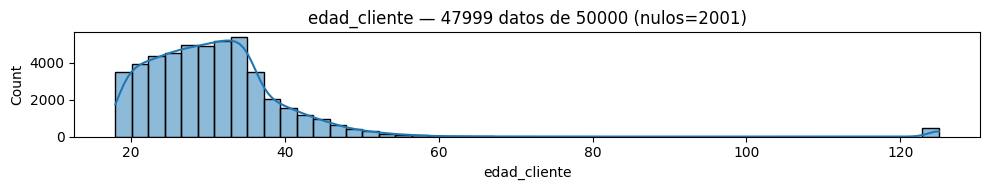

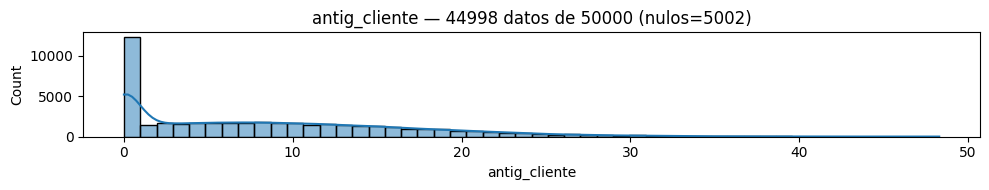

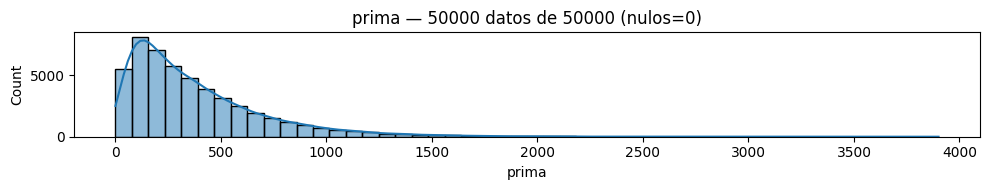

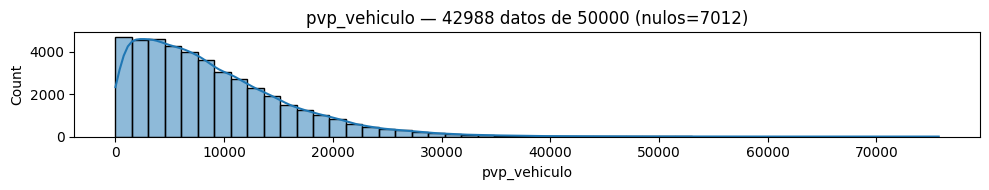

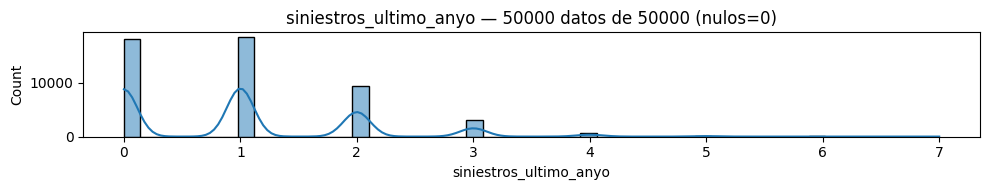

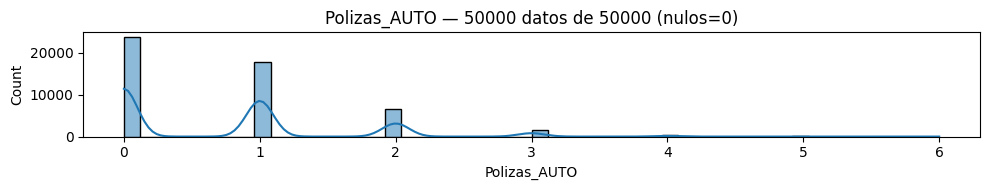

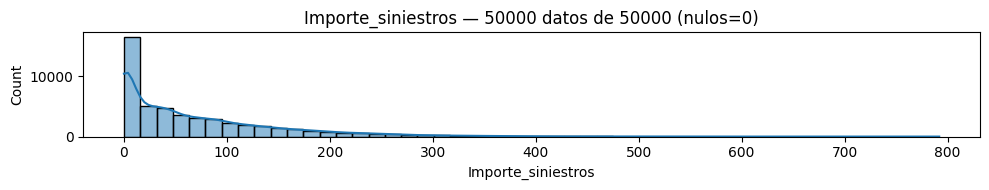

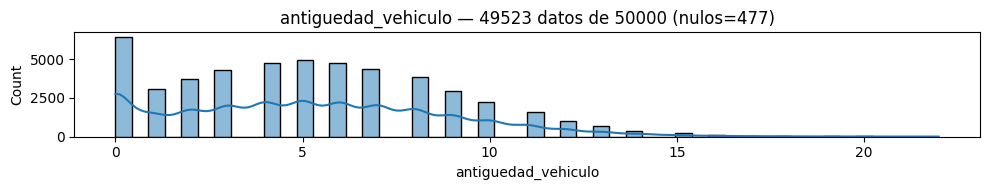

In [149]:
for feature in vars_num:
    s = df_anulaciones_clean[feature]
    n_total = s.size
    s_valid = s.replace([np.inf, -np.inf], np.nan).dropna()
    n_valid = s_valid.size
    n_nulls = n_total - n_valid

    plt.figure(figsize=(10, 2))
    sns.histplot(x=s_valid, kde=True, bins=50)
    plt.title(f"{feature} — {n_valid} datos de {n_total} (nulos={n_nulls})")
    plt.tight_layout()
    plt.show()

In [150]:
# Resumen de numericas
df_summary = summarize_numeric_features(
    df_anulaciones_clean,
    vars_num
)

display(df_summary)

,feature,n_total,n_valid,n_nulls,p00,p01,p05,p10,p25,p50,p75,p90,p95,p99,p100,iqr,tukey_low,tukey_high,mad,mad_low,mad_high,pct_out_tukey,pct_out_mad
0,prima,50000,50000,0,0.030000,10.589900,42.949500,72.250000,144.570000,289.590000,520.302500,813.633000,1029.364500,1518.761600,3900.690000,375.732500,-419.028750,1083.901250,251.233983,-464.111949,1043.291949,4.222000,4.770000
1,Polizas_AUTO,50000,50000,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,3.000000,6.000000,1.000000,-1.500000,2.500000,1.482600,-3.447800,5.447800,4.098000,0.014000
2,Importe_siniestros,50000,50000,0,0.000000,0.000000,0.000000,0.000000,3.360795,42.782028,104.103601,179.137052,229.633130,338.436809,791.968944,100.742806,-147.753414,255.217810,63.428634,-147.503875,233.067930,3.436000,4.782000
3,pvp_vehiculo,50000,42988,7012,0.142296,135.550797,692.178112,1391.172508,3496.191735,7315.355145,12532.342421,18396.167569,22261.442497,31098.902582,75734.903519,9036.150685,-10058.034293,26086.568449,6378.628399,-11820.530051,26451.240341,2.570485,2.384386
4,edad_cliente,50000,47999,2001,18.000000,18.300000,19.500000,20.900000,24.600000,29.900000,34.900000,40.700000,45.100000,62.002000,125.000000,10.300000,9.150000,50.350000,7.561260,7.216220,52.583780,2.256297,1.722953
5,antig_cliente,50000,44998,5002,0.000000,0.000000,0.000000,0.000000,0.210000,6.940000,13.700000,19.700000,23.300000,30.400000,48.300000,13.490000,-20.025000,33.935000,10.007550,-23.082650,36.962650,0.344460,0.146673
6,antiguedad_vehiculo,50000,49523,477,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,8.000000,10.000000,12.000000,14.000000,22.000000,6.000000,-7.000000,17.000000,4.447800,-8.343399,18.343399,0.109040,0.040385
7,siniestros_ultimo_anyo,50000,50000,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,3.000000,4.000000,7.000000,2.000000,-3.000000,5.000000,1.482600,-3.447800,5.447800,0.058000,0.058000


### Eliminar registros con edad_cliente>70

In [151]:
# Mantener edad <= 70 (los NaN NO pasan el filtro)
mask = df_anulaciones_clean["edad_cliente"] <= 70
n_filtrados = (~mask).sum()

df_anulaciones_clean = df_anulaciones_clean.loc[mask].copy()
print(f"Se eliminaron {n_filtrados}.")

Se eliminaron 2452.


### Check data

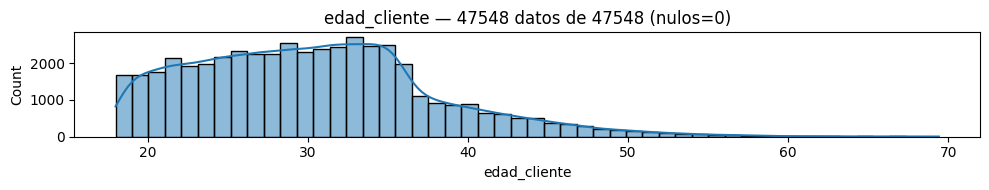

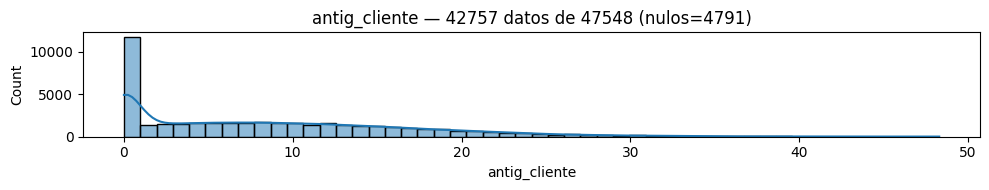

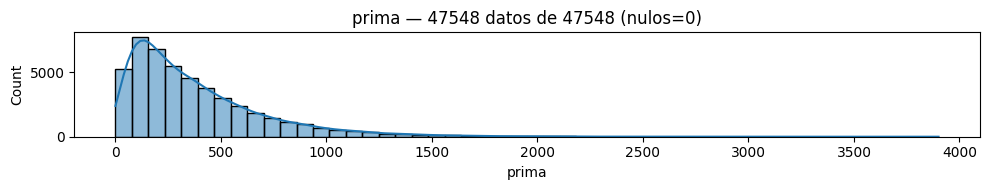

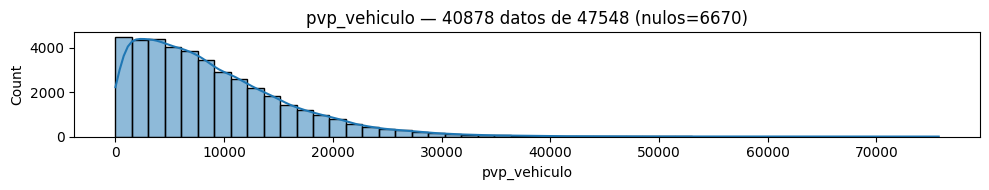

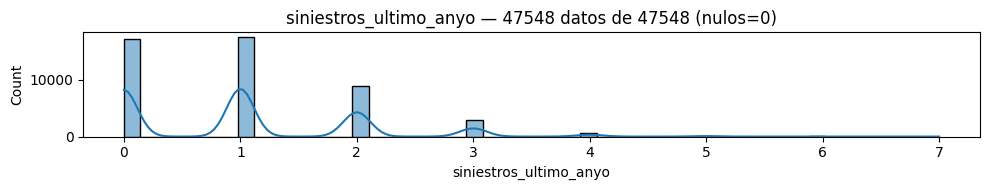

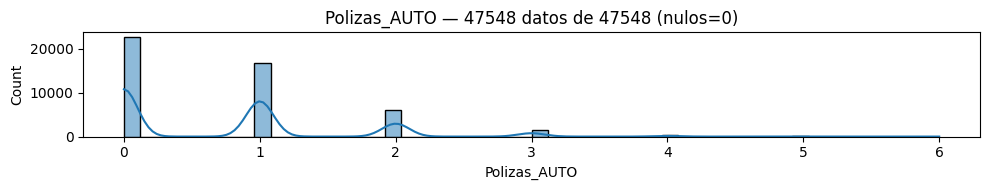

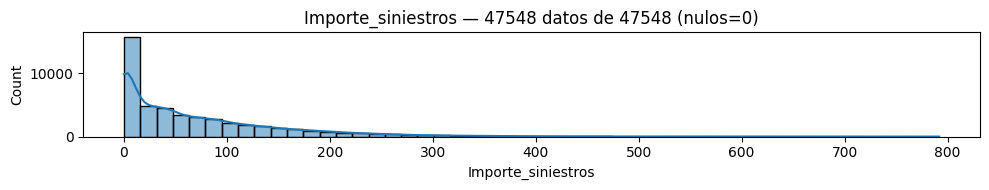

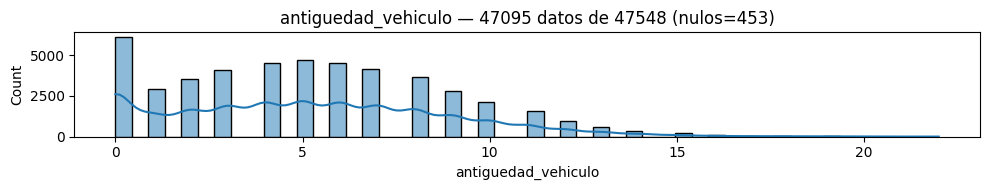

In [152]:
for feature in vars_num:
    s = df_anulaciones_clean[feature]
    n_total = s.size
    s_valid = s.replace([np.inf, -np.inf], np.nan).dropna()
    n_valid = s_valid.size
    n_nulls = n_total - n_valid

    plt.figure(figsize=(10, 2))
    sns.histplot(x=s_valid, kde=True, bins=50)
    plt.title(f"{feature} — {n_valid} datos de {n_total} (nulos={n_nulls})")
    plt.tight_layout()
    plt.show()

In [153]:
# Resumen de numericas
df_summary = summarize_numeric_features(
    df_anulaciones_clean,
    vars_num
)

display(df_summary)

,feature,n_total,n_valid,n_nulls,p00,p01,p05,p10,p25,p50,p75,p90,p95,p99,p100,iqr,tukey_low,tukey_high,mad,mad_low,mad_high,pct_out_tukey,pct_out_mad
0,prima,47548,47548,0,0.030000,10.654700,43.110000,72.530000,144.867500,290.230000,521.380000,814.449000,1030.795000,1519.508300,3900.690000,376.512500,-419.901250,1086.148750,251.671350,-464.784050,1045.244050,4.206276,4.763607
1,Polizas_AUTO,47548,47548,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,3.000000,6.000000,1.000000,-1.500000,2.500000,1.482600,-3.447800,5.447800,4.109531,0.012619
2,Importe_siniestros,47548,47548,0,0.000000,0.000000,0.000000,0.000000,3.436388,42.831384,104.103601,179.126251,229.552251,338.676646,791.968944,100.667213,-147.564431,255.104420,63.501810,-147.674047,233.336815,3.440734,4.746782
3,pvp_vehiculo,47548,40878,6670,0.142296,136.864515,692.656234,1394.044471,3500.247770,7317.266444,12547.316148,18402.442149,22261.343969,31172.227897,75734.903519,9047.068377,-10070.354796,26117.918714,6386.923477,-11843.503989,26478.036876,2.571065,2.390039
4,edad_cliente,47548,47548,0,18.000000,18.300000,19.500000,20.900000,24.500000,29.800000,34.700000,40.200000,44.100000,51.600000,69.400000,10.200000,9.200000,50.000000,7.561260,7.116220,52.483780,1.442753,0.803399
5,antig_cliente,47548,42757,4791,0.000000,0.000000,0.000000,0.000000,0.200000,6.950000,13.700000,19.700000,23.300000,30.400000,48.300000,13.500000,-20.050000,33.950000,10.007550,-23.072650,36.972650,0.329771,0.137989
6,antiguedad_vehiculo,47548,47095,453,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,8.000000,10.000000,12.000000,14.000000,22.000000,6.000000,-7.000000,17.000000,4.447800,-8.343399,18.343399,0.106168,0.038221
7,siniestros_ultimo_anyo,47548,47548,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,3.000000,4.000000,7.000000,2.000000,-3.000000,5.000000,1.482600,-3.447800,5.447800,0.052578,0.052578


### Cambio nombre variables

In [154]:
vars_key

['id_poliza']

In [155]:

# 1) Renombra SOLO las que no están en vars_key (minúsculas + prefijo "socio_")
rename_map = {c: f"anul_{c.lower()}" for c in df_anulaciones_clean.columns if c not in vars_key+[var_target]}
df_anulaciones_clean = df_anulaciones_clean.rename(columns=rename_map)

# 2) Reordena: primero vars_key (en el orden dado), luego el resto
keys_first = [c for c in vars_key if c in df_anulaciones_clean.columns]
rest = [c for c in df_anulaciones_clean.columns if c not in keys_first]
df_anulaciones_clean = df_anulaciones_clean.loc[:, keys_first + rest]


df_anulaciones_clean.head()

,id_poliza,anula,anul_edad_cliente,anul_antig_cliente,anul_prima,anul_pvp_vehiculo,anul_siniestros_ultimo_anyo,anul_polizas_auto,anul_importe_siniestros,anul_antiguedad_vehiculo,anul_canal_entrada_norm,anul_cia_procedencia_norm,anul_profesion_norm,anul_codigo_zona,anul_id_agente_gestor,anul_flag_gestion_multas,anul_flag_vehiculo_sustitucion,anul_flag_tipo_pago_anual
0,1,0,27.4,0.00,90.30,10457.084954,0,0,0.000000,4.0,<NA>,ocaso,transporte_de_mercancias,483.0,24,0,1,0
1,2,0,24.9,4.49,194.06,12078.987975,1,0,268.834435,5.0,oficina_adeslas,mutua_madrilena,transporte_de_mercancias,832.0,21,0,1,1
2,3,0,37.4,0.00,186.04,7049.969489,1,1,2.504393,10.0,oficina_adeslas,liberty,<NA>,256.0,17,0,1,0
3,4,0,19.8,8.45,128.71,7097.456241,1,3,60.670131,7.0,telefonico,mutua_madrilena,logistica,627.0,90,0,1,1
4,5,0,35.6,NaN,357.16,24563.357655,0,3,0.000000,5.0,telefonico,ocaso,estudiante,654.0,72,0,1,1


In [156]:
df_anulaciones_clean.shape

(47548, 18)

### Write

In [157]:
file_tab = DATA_PATH / "df_anulaciones_clean.csv"
df_anulaciones_clean.to_csv(file_tab, index=False)

## Data Cleaning - Sociodemograficas

In [158]:
df_sociodemo_clean = df_sociodemo.copy()

In [159]:
print(df_sociodemo_clean.shape)
print(df_sociodemo_clean.codigo_zona.nunique())

display(df_sociodemo_clean.head(2))



with pd.option_context('display.max_rows', None):
    print(df_sociodemo_clean.dtypes)     
    
    
vars_keys_socio = ['codigo_zona', 'CAPITAL_PROVINCIA']

vars_socio=list(set(df_sociodemo_clean.columns)-set(vars_keys_socio))


(297, 400)
297


,codigo_zona,NUM_FAMILIAS,NUM_PERSONAS,NUM_PERSONAS_POR_FAMILIA,CAPITAL_PROVINCIA,TAMANO_MUNICIPIO,SUPERFICIE,DENSIDAD_POBLACION,ROOMMATES_PCT,ROOMMATES_TOTAL,SINGLE_JOVEN_PCT,SINGLE_JOVEN_TOTAL,SINGLE_ADULTO_PCT,SINGLE_ADULTO_TOTAL,PAREJA_JOVEN_PCT,PAREJA_JOVEN_TOTAL,PAREJA_ADULTA_PCT,PAREJA_ADULTA_TOTAL,FAMILIA_MONOPARENTAL_PCT,FAMILIA_MONOPARENTAL_TOTAL,NIDO_LLENO_PEQ_PCT,NIDO_LLENO_PEQ_TOTAL,NIDO_LLENO_JOV_PCT,NIDO_LLENO_JOV_TOTAL,NIDO_LLENO_MIX_PCT,NIDO_LLENO_MIX_TOTAL,NIDO_MULTINUCLEAR_PCT,NIDO_MULTINUCLEAR_TOTAL,ABUELOS_PCT,ABUELOS_TOTAL,JUBILADO_PCT,JUBILADO_TOTAL,PAREJA_JUBILADOS_PCT,PAREJA_JUBILADOS_TOTAL,INGRESOS_MES_NETOS_FAM,INGRESOS_ANUAL_NETOS_FAM,INGRESOS_MES_NETOS_PERS,INGRESOS_ANUAL_NETOS_PERS,INGRESOS_MES_FAM_ACTIVAS,ING_FAM_ACTIVAS_POR_OCUPADO,ING_FAM_ACTIVAS_POR_MIEMBRO,INGRESOS_MES_FAM_JUBILADOS,PCT_FAM_ING_INFERIOR_A_1389,PCT_FAM_ING_ENTRE_1389_Y_1641,PCT_FAM_ING_ENTRE_1641_Y_2122,PCT_FAM_ING_ENTRE_2122_Y_2589,PCT_FAM_ING_SUPERIOR_A_2589,INGRESOS_NETOS_MES_P5,INGRESOS_NETOS_MES_P10,INGRESOS_NETOS_MES_P15,INGRESOS_NETOS_MES_P20,INGRESOS_NETOS_MES_P25,INGRESOS_NETOS_MES_P30,INGRESOS_NETOS_MES_P35,INGRESOS_NETOS_MES_P40,INGRESOS_NETOS_MES_P45,INGRESOS_NETOS_MES_P50,INGRESOS_NETOS_MES_P55,INGRESOS_NETOS_MES_P60,INGRESOS_NETOS_MES_P65,INGRESOS_NETOS_MES_P70,INGRESOS_NETOS_MES_P75,INGRESOS_NETOS_MES_P80,INGRESOS_NETOS_MES_P85,INGRESOS_NETOS_MES_P90,INGRESOS_NETOS_MES_P95,RENTA_BRUTA_HOGAR,RENTA_DISP_HOGAR,RENTA_DISP_HOGAR_INCL_PREST,RENTA_DISP_HOGAR_INCL_ALQ,RENTA_DISP_HOGAR_INCL_PENS_PRIV,RENTA_NETA_ALQUILER_PROPIEDAD,RENTA_BRUTA_ALQUILER_PROPIEDAD,RENTA_NETA_MENORES_16,RENTA_BRUTA_MENORES_16,CUOTA_HIPOTECA_MES,IMPUESTO_SOBRE_PATRIMONIO,AYUDA_NETA_FAMILIA_E_HIJOS,AYUDA_BRUTA_FAMILIA_E_HIJOS,AYUDA_NETA_VIVIENDA,INGRESOS_NETOS_ASIST_SOCIAL,INGRESOS_BRUTOS_ASIST_SOCIAL,TRANSF_PERC_OH_NETAS,TRANSF_PERC_OH_PENSION,TRANSF_ABON_OH_NETAS,TRANSF_ABON_OH_BRUTAS,TRANSF_ABON_OH_PENSION,TRANSF_ABON_OH_PENS_BRUTAS,INT_DIV_Y_GANANCIAS_NETAS,INT_DIV_Y_GANANCIAS_BRUTAS,INT_PAGADOS_PRESTAMO_NETOS,TOTAL_GASTOS_FAMILIARES,TOTAL_VIVIENDA_Y_SUMINISTROS,TOTAL_ALQULERES_VIVIENDA,TOTAL_ALQUILERES_VIV_PPAL,TOTAL_OTROS_ALQUILERES,OTROS_ALQUILERES_NO_VAC_O_ENSEN,OTROS_ALQ_ENSENANZA,ALQUILERES_GARAJE_VIV_PPAL,ALQUILERES_GARAJE_OTRAS_VIV,OTROS_ALQUILERES,TOTAL_ALQ_IMPUT_VIVIENDA,TOTAL_ALQ_IMPUT_VIV_PPAL,TOTAL_OTROS_ALQ_IMPUT,ALQ_IMPUT_OTRAS_VIV,ALQ_IMPUT_VIV_PPAL_CEDIDA,ALQ_IMPUT_OTRAS_VIV_CEDIDAS,TOTAL_GASTOS_MANT_Y_REP_VIV,MATERIALES_MANT_Y_REP_VIV,TOTAL_SERV_MANT_Y_REP_VIV,SERV_FONTANERIA,SERV_ELECTRICIDAD,SERV_MANT_SIST_CALEFACCION,SERV_PINTURA,SERV_CARPINTERIA,SERV_ALBANILERIA,SERV_SUMINISTROS_AGUA_Y_OTROS,TOTAL_SUMINISTRO_AGUA,SUMINISTRO_AGUA_VIV_PPAL,SUMINISTRO_AGUA_OTRAS_VIV,TOTAL_SERV_RECOGIDA_BASURA,SERV_REC_BASURA_VIV_PPAL,SERV_REC_BASURA_OTRAS_VIV,TOTAL_SERV_SANEAMIENTO,SERV_SANEAMIENTO_VIV_PPAL,SERV_SANEAMIENTO_OTRAS_VIV,TOTAL_OTROS_SERV_REL_VIV,GASTOS_COMUNITARIOS_VIV_PPAL,GASTOS_COMUNITARIOS_OTRAS_VIV,SERV_SEGURIDAD_VIV_PPAL,SERV_SEGURIDAD_OTRAS_VIV,OTROS_SERV_REL_VIV_PPAL,OTROS_SERV_REL_OTRAS_VIV,TOTAL_ELECTR_GAS_Y_OTROS_COMB,TOTAL_ELECTRICIDAD,ELECTRICIDAD_VIV_PPAL,ELECTRICIDAD_OTRAS_VIV,TOTAL_GAS,GAS_CIUDAD_Y_NATURAL_VIV_PPAL,GAS_CIUDAD_Y_NATURAL_OTRAS_VIV,GAS_LICUADO_VIV_PPAL,GAS_LICUADO_OTRAS_VIV,TOTAL_COMBUSTIBLES_LIQUIDOS,COMBUSTIBLES_LIQUIDOS_VIV_PPAL,COMBUSTIBLES_LIQUIDOS_OTRAS_VIV,TOTAL_COMBUSTIBLE_SOLIDOS,CARBON_VIV_PPAL,CARBON_OTRAS_VIV,OTROS_COMB_SOLIDOS_VIV_PPAL,OTROS_COMB_SOLIDOS_OTRAS_VIV,TOTAL_SALUD,TOTAL_PROD_FARMA_Y_APARAT_TERAP,TOTAL_PROD_FARMACEUTICOS,PRODUCTOS_FARMACEUTICOS,PRODUCTOS_HOMEOPATICOS,TOTAL_OTROS_PROD_MEDICOS,PRUEBA_EMBARAZO_Y_ANTICONCEP,OTROS_PRODUCTOS_MEDICOS,TOTAL_OTROS_APARAT_Y_MAT_TERAP,GAFAS_GRAD_Y_LENTES_CONTACTO,AUDIFONOS,REPARACION_APARAT_Y_MAT_TERAP,OTROS_APARAT_Y_MAT_TERAP,TOTAL_SERV_MEDIC_Y_PARAMED_AMBU,TOTAL_SERV_MEDIC_AMBULAT,MED_GENERAL_Y_PEDIATRIA_AMBU,MED_ESPECIALISTA_AMBU,TOTAL_SERV_DENTALES,TOTAL_SERV_PARAMEDIC_AMBU,SERV_ANAL_CLINIC_Y_DIAGNOS,SERV_REHABILIT_ALQ_EQUIPO_TER

codigo_zona                          int64
NUM_FAMILIAS                         int64
NUM_PERSONAS                         int64
NUM_PERSONAS_POR_FAMILIA           float64
CAPITAL_PROVINCIA                    int64
TAMANO_MUNICIPIO                     int64
SUPERFICIE                           int64
DENSIDAD_POBLACION                 float64
ROOMMATES_PCT                      float64
ROOMMATES_TOTAL                      int64
SINGLE_JOVEN_PCT                   float64
SINGLE_JOVEN_TOTAL                   int64
SINGLE_ADULTO_PCT                  float64
SINGLE_ADULTO_TOTAL                  int64
PAREJA_JOVEN_PCT                   float64
PAREJA_JOVEN_TOTAL                   int64
PAREJA_ADULTA_PCT                  float64
PAREJA_ADULTA_TOTAL                  int64
FAMILIA_MONOPARENTAL_PCT           float64
FAMILIA_MONOPARENTAL_TOTAL           int64
NIDO_LLENO_PEQ_PCT                 float64
NIDO_LLENO_PEQ_TOTAL                 int64
NIDO_LLENO_JOV_PCT                 float64
NIDO_LLENO_

### Revision de variables con nulos

In [160]:

n_total = len(df_sociodemo_clean)
null_counts = df_sociodemo_clean.isna().sum()

df_nulls = (
    pd.DataFrame({
        "var_name": null_counts.index,
        "n_nulls": null_counts.values,
    })
    .query("n_nulls > 0")  # <- solo columnas con nulos
    .assign(porc_nulls=lambda d: d["n_nulls"] / n_total * 100)
    .sort_values("porc_nulls", ascending=False, kind="mergesort")
    .reset_index(drop=True)
)

display(df_nulls)
print(f"Columnas con nulos: {len(df_nulls)} / {df_sociodemo_clean.shape[1]}")

# Decision: Eliminar variables con mas de 30% nulos
vars_to_drop = df_nulls.query("porc_nulls > 30")["var_name"].tolist()
print("Variables a eliminar (más de 30% nulos):")
print(vars_to_drop)

df_sociodemo_clean.drop(columns=vars_to_drop, inplace=True)
print(df_sociodemo_clean.shape)

,var_name,n_nulls,porc_nulls
0,PRECIO_INMUEBLES_SUELO_ALQ,14,4.713805
1,PRECIO_M2_SUELO_ALQ,14,4.713805
2,PROMED_M2_INMUEBLES_SUELO_ALQ,14,4.713805
3,PRECIO_INMUEBLES_SUELO_COMP,8,2.693603
4,PRECIO_M2_SUELO_COMP,8,2.693603
5,PROMED_M2_INMUEBLES_SUELO_COMP,8,2.693603


Columnas con nulos: 6 / 400
Variables a eliminar (más de 30% nulos):
[]
(297, 400)


In [161]:
vars_keys_socio

['codigo_zona', 'CAPITAL_PROVINCIA']

### Cambio nombre variables

In [162]:
# 1) Renombra SOLO las que no están en vars_keys_socio (minúsculas + prefijo "socio_")
rename_map = {c: f"socio_{c.lower()}" for c in df_sociodemo_clean.columns if c not in vars_keys_socio}
df_sociodemo_clean = df_sociodemo_clean.rename(columns=rename_map)

# 2) Reordena: primero vars_keys_socio (en el orden dado), luego el resto
keys_first = [c for c in vars_keys_socio if c in df_sociodemo_clean.columns]
rest = [c for c in df_sociodemo_clean.columns if c not in keys_first]
df_sociodemo_clean = df_sociodemo_clean.loc[:, keys_first + rest]


df_sociodemo_clean.head()

,codigo_zona,CAPITAL_PROVINCIA,socio_num_familias,socio_num_personas,socio_num_personas_por_familia,socio_tamano_municipio,socio_superficie,socio_densidad_poblacion,socio_roommates_pct,socio_roommates_total,socio_single_joven_pct,socio_single_joven_total,socio_single_adulto_pct,socio_single_adulto_total,socio_pareja_joven_pct,socio_pareja_joven_total,socio_pareja_adulta_pct,socio_pareja_adulta_total,socio_familia_monoparental_pct,socio_familia_monoparental_total,socio_nido_lleno_peq_pct,socio_nido_lleno_peq_total,socio_nido_lleno_jov_pct,socio_nido_lleno_jov_total,socio_nido_lleno_mix_pct,socio_nido_lleno_mix_total,socio_nido_multinuclear_pct,socio_nido_multinuclear_total,socio_abuelos_pct,socio_abuelos_total,socio_jubilado_pct,socio_jubilado_total,socio_pareja_jubilados_pct,socio_pareja_jubilados_total,socio_ingresos_mes_netos_fam,socio_ingresos_anual_netos_fam,socio_ingresos_mes_netos_pers,socio_ingresos_anual_netos_pers,socio_ingresos_mes_fam_activas,socio_ing_fam_activas_por_ocupado,socio_ing_fam_activas_por_miembro,socio_ingresos_mes_fam_jubilados,socio_pct_fam_ing_inferior_a_1389,socio_pct_fam_ing_entre_1389_y_1641,socio_pct_fam_ing_entre_1641_y_2122,socio_pct_fam_ing_entre_2122_y_2589,socio_pct_fam_ing_superior_a_2589,socio_ingresos_netos_mes_p5,socio_ingresos_netos_mes_p10,socio_ingresos_netos_mes_p15,socio_ingresos_netos_mes_p20,socio_ingresos_netos_mes_p25,socio_ingresos_netos_mes_p30,socio_ingresos_netos_mes_p35,socio_ingresos_netos_mes_p40,socio_ingresos_netos_mes_p45,socio_ingresos_netos_mes_p50,socio_ingresos_netos_mes_p55,socio_ingresos_netos_mes_p60,socio_ingresos_netos_mes_p65,socio_ingresos_netos_mes_p70,socio_ingresos_netos_mes_p75,socio_ingresos_netos_mes_p80,socio_ingresos_netos_mes_p85,socio_ingresos_netos_mes_p90,socio_ingresos_netos_mes_p95,socio_renta_bruta_hogar,socio_renta_disp_hogar,socio_renta_disp_hogar_incl_prest,socio_renta_disp_hogar_incl_alq,socio_renta_disp_hogar_incl_pens_priv,socio_renta_neta_alquiler_propiedad,socio_renta_bruta_alquiler_propiedad,socio_renta_neta_menores_16,socio_renta_bruta_menores_16,socio_cuota_hipoteca_mes,socio_impuesto_sobre_patrimonio,socio_ayuda_neta_familia_e_hijos,socio_ayuda_bruta_familia_e_hijos,socio_ayuda_neta_vivienda,socio_ingresos_netos_asist_social,socio_ingresos_brutos_asist_social,socio_transf_perc_oh_netas,socio_transf_perc_oh_pension,socio_transf_abon_oh_netas,socio_transf_abon_oh_brutas,socio_transf_abon_oh_pension,socio_transf_abon_oh_pens_brutas,socio_int_div_y_ganancias_netas,socio_int_div_y_ganancias_brutas,socio_int_pagados_prestamo_netos,socio_total_gastos_familiares,socio_total_vivienda_y_suministros,socio_total_alquleres_vivienda,socio_total_alquileres_viv_ppal,socio_total_otros_alquileres,socio_otros_alquileres_no_vac_o_ensen,socio_otros_alq_ensenanza,socio_alquileres_garaje_viv_ppal,socio_alquileres_garaje_otras_viv,socio_otros_alquileres,socio_total_alq_imput_vivienda,socio_total_alq_imput_viv_ppal,socio_total_otros_alq_imput,socio_alq_imput_otras_viv,socio_alq_imput_viv_ppal_cedida,socio_alq_imput_otras_viv_cedidas,socio_total_gastos_mant_y_rep_viv,socio_materiales_mant_y_rep_viv,socio_total_serv_mant_y_rep_viv,socio_serv_fontaneria,socio_serv_electricidad,socio_serv_mant_sist_calefaccion,socio_serv_pintura,socio_serv_carpinteria,socio_serv_albanileria,socio_serv_suministros_agua_y_otros,socio_total_suministro_agua,socio_suministro_agua_viv_ppal,socio_suministro_agua_otras_viv,socio_total_serv_recogida_basura,socio_serv_rec_basura_viv_ppal,socio_serv_rec_basura_otras_viv,socio_total_serv_saneamiento,socio_serv_saneamiento_viv_ppal,socio_serv_saneamiento_otras_viv,socio_total_otros_serv_rel_viv,socio_gastos_comunitarios_viv_ppal,socio_gastos_comunitarios_otras_viv,socio_serv_seguridad_viv_ppal,socio_serv_seguridad_otras_viv,socio_otros_serv_rel_viv_ppal,socio_otros_serv_rel_otras_viv,socio_total_electr_gas_y_otros_comb,socio_total_electricidad,socio_electricidad_viv_ppal,socio_electricidad_otras_viv,socio_total_gas,socio_gas_ciudad_y_natur

### Write

In [163]:
file_tab = DATA_PATH / "df_sociodemo_clean.csv"
df_sociodemo_clean.to_csv(file_tab, index=False)

# Cruce

In [164]:
vars_key

for i in df_anulaciones_clean.columns:
    print(i)

id_poliza
anula
anul_edad_cliente
anul_antig_cliente
anul_prima
anul_pvp_vehiculo
anul_siniestros_ultimo_anyo
anul_polizas_auto
anul_importe_siniestros
anul_antiguedad_vehiculo
anul_canal_entrada_norm
anul_cia_procedencia_norm
anul_profesion_norm
anul_codigo_zona
anul_id_agente_gestor
anul_flag_gestion_multas
anul_flag_vehiculo_sustitucion
anul_flag_tipo_pago_anual


In [165]:
# Columnas de B a traer (excluye las claves definidas en vars_keys_socio)

#Con esto estamos dejando CAPITAL_PROVINCIA fuera del merge, de momento se sera considerada.
cols_b = [c for c in df_sociodemo_clean.columns if c not in vars_keys_socio]

# Asegura unicidad por codigo_zona en B y selecciona solo las columnas necesarias
b_sel = (
    df_sociodemo_clean
    .drop_duplicates(subset=["codigo_zona"])
    [["codigo_zona", *cols_b]]
)

# LEFT JOIN: A.* + columnas no-clave de B
df_muestra_vars = (
    df_anulaciones_clean
    .merge(b_sel, how="left", left_on="anul_codigo_zona", right_on="codigo_zona")
    .drop(columns=["codigo_zona"])  # opcional: elimina la clave de B si no la necesitas
)

print(df_muestra_vars.shape)
display(df_muestra_vars.head(3))


(47548, 416)


,id_poliza,anula,anul_edad_cliente,anul_antig_cliente,anul_prima,anul_pvp_vehiculo,anul_siniestros_ultimo_anyo,anul_polizas_auto,anul_importe_siniestros,anul_antiguedad_vehiculo,anul_canal_entrada_norm,anul_cia_procedencia_norm,anul_profesion_norm,anul_codigo_zona,anul_id_agente_gestor,anul_flag_gestion_multas,anul_flag_vehiculo_sustitucion,anul_flag_tipo_pago_anual,socio_num_familias,socio_num_personas,socio_num_personas_por_familia,socio_tamano_municipio,socio_superficie,socio_densidad_poblacion,socio_roommates_pct,socio_roommates_total,socio_single_joven_pct,socio_single_joven_total,socio_single_adulto_pct,socio_single_adulto_total,socio_pareja_joven_pct,socio_pareja_joven_total,socio_pareja_adulta_pct,socio_pareja_adulta_total,socio_familia_monoparental_pct,socio_familia_monoparental_total,socio_nido_lleno_peq_pct,socio_nido_lleno_peq_total,socio_nido_lleno_jov_pct,socio_nido_lleno_jov_total,socio_nido_lleno_mix_pct,socio_nido_lleno_mix_total,socio_nido_multinuclear_pct,socio_nido_multinuclear_total,socio_abuelos_pct,socio_abuelos_total,socio_jubilado_pct,socio_jubilado_total,socio_pareja_jubilados_pct,socio_pareja_jubilados_total,socio_ingresos_mes_netos_fam,socio_ingresos_anual_netos_fam,socio_ingresos_mes_netos_pers,socio_ingresos_anual_netos_pers,socio_ingresos_mes_fam_activas,socio_ing_fam_activas_por_ocupado,socio_ing_fam_activas_por_miembro,socio_ingresos_mes_fam_jubilados,socio_pct_fam_ing_inferior_a_1389,socio_pct_fam_ing_entre_1389_y_1641,socio_pct_fam_ing_entre_1641_y_2122,socio_pct_fam_ing_entre_2122_y_2589,socio_pct_fam_ing_superior_a_2589,socio_ingresos_netos_mes_p5,socio_ingresos_netos_mes_p10,socio_ingresos_netos_mes_p15,socio_ingresos_netos_mes_p20,socio_ingresos_netos_mes_p25,socio_ingresos_netos_mes_p30,socio_ingresos_netos_mes_p35,socio_ingresos_netos_mes_p40,socio_ingresos_netos_mes_p45,socio_ingresos_netos_mes_p50,socio_ingresos_netos_mes_p55,socio_ingresos_netos_mes_p60,socio_ingresos_netos_mes_p65,socio_ingresos_netos_mes_p70,socio_ingresos_netos_mes_p75,socio_ingresos_netos_mes_p80,socio_ingresos_netos_mes_p85,socio_ingresos_netos_mes_p90,socio_ingresos_netos_mes_p95,socio_renta_bruta_hogar,socio_renta_disp_hogar,socio_renta_disp_hogar_incl_prest,socio_renta_disp_hogar_incl_alq,socio_renta_disp_hogar_incl_pens_priv,socio_renta_neta_alquiler_propiedad,socio_renta_bruta_alquiler_propiedad,socio_renta_neta_menores_16,socio_renta_bruta_menores_16,socio_cuota_hipoteca_mes,socio_impuesto_sobre_patrimonio,socio_ayuda_neta_familia_e_hijos,socio_ayuda_bruta_familia_e_hijos,socio_ayuda_neta_vivienda,socio_ingresos_netos_asist_social,socio_ingresos_brutos_asist_social,socio_transf_perc_oh_netas,socio_transf_perc_oh_pension,socio_transf_abon_oh_netas,socio_transf_abon_oh_brutas,socio_transf_abon_oh_pension,socio_transf_abon_oh_pens_brutas,socio_int_div_y_ganancias_netas,socio_int_div_y_ganancias_brutas,socio_int_pagados_prestamo_netos,socio_total_gastos_familiares,socio_total_vivienda_y_suministros,socio_total_alquleres_vivienda,socio_total_alquileres_viv_ppal,socio_total_otros_alquileres,socio_otros_alquileres_no_vac_o_ensen,socio_otros_alq_ensenanza,socio_alquileres_garaje_viv_ppal,socio_alquileres_garaje_otras_viv,socio_otros_alquileres,socio_total_alq_imput_vivienda,socio_total_alq_imput_viv_ppal,socio_total_otros_alq_imput,socio_alq_imput_otras_viv,socio_alq_imput_viv_ppal_cedida,socio_alq_imput_otras_viv_cedidas,socio_total_gastos_mant_y_rep_viv,socio_materiales_mant_y_rep_viv,socio_total_serv_mant_y_rep_viv,socio_serv_fontaneria,socio_serv_electricidad,socio_serv_mant_sist_calefaccion,socio_serv_pintura,socio_serv_carpinteria,socio_serv_albanileria,socio_serv_suministros_agua_y_otros,socio_total_suministro_agua,socio_suministro_agua_viv_ppal,socio_suministro_agua_otras_viv,socio_total_serv_recogida_basura,socio_serv_rec_basura_viv_ppal,socio_serv_rec_basura_otras_viv,socio_total_serv_saneamiento,socio_serv_saneamiento_viv_ppal,socio_serv_saneamiento_otras_viv,socio_total_otros_serv_rel_viv,socio_gastos_

In [166]:
#Se decide no tratar mas adelante la variable aunl_codigo_zona en esta iteracion

df_muestra_vars.drop(columns=['anul_codigo_zona'], inplace=True)

print(df_muestra_vars.shape)

(47548, 415)


### Write

In [167]:
file_tab = DATA_PATH / "df_muestra_vars.csv"
df_muestra_vars.to_csv(file_tab, index=False)

In [168]:
df_muestra_vars.head()

,id_poliza,anula,anul_edad_cliente,anul_antig_cliente,anul_prima,anul_pvp_vehiculo,anul_siniestros_ultimo_anyo,anul_polizas_auto,anul_importe_siniestros,anul_antiguedad_vehiculo,anul_canal_entrada_norm,anul_cia_procedencia_norm,anul_profesion_norm,anul_id_agente_gestor,anul_flag_gestion_multas,anul_flag_vehiculo_sustitucion,anul_flag_tipo_pago_anual,socio_num_familias,socio_num_personas,socio_num_personas_por_familia,socio_tamano_municipio,socio_superficie,socio_densidad_poblacion,socio_roommates_pct,socio_roommates_total,socio_single_joven_pct,socio_single_joven_total,socio_single_adulto_pct,socio_single_adulto_total,socio_pareja_joven_pct,socio_pareja_joven_total,socio_pareja_adulta_pct,socio_pareja_adulta_total,socio_familia_monoparental_pct,socio_familia_monoparental_total,socio_nido_lleno_peq_pct,socio_nido_lleno_peq_total,socio_nido_lleno_jov_pct,socio_nido_lleno_jov_total,socio_nido_lleno_mix_pct,socio_nido_lleno_mix_total,socio_nido_multinuclear_pct,socio_nido_multinuclear_total,socio_abuelos_pct,socio_abuelos_total,socio_jubilado_pct,socio_jubilado_total,socio_pareja_jubilados_pct,socio_pareja_jubilados_total,socio_ingresos_mes_netos_fam,socio_ingresos_anual_netos_fam,socio_ingresos_mes_netos_pers,socio_ingresos_anual_netos_pers,socio_ingresos_mes_fam_activas,socio_ing_fam_activas_por_ocupado,socio_ing_fam_activas_por_miembro,socio_ingresos_mes_fam_jubilados,socio_pct_fam_ing_inferior_a_1389,socio_pct_fam_ing_entre_1389_y_1641,socio_pct_fam_ing_entre_1641_y_2122,socio_pct_fam_ing_entre_2122_y_2589,socio_pct_fam_ing_superior_a_2589,socio_ingresos_netos_mes_p5,socio_ingresos_netos_mes_p10,socio_ingresos_netos_mes_p15,socio_ingresos_netos_mes_p20,socio_ingresos_netos_mes_p25,socio_ingresos_netos_mes_p30,socio_ingresos_netos_mes_p35,socio_ingresos_netos_mes_p40,socio_ingresos_netos_mes_p45,socio_ingresos_netos_mes_p50,socio_ingresos_netos_mes_p55,socio_ingresos_netos_mes_p60,socio_ingresos_netos_mes_p65,socio_ingresos_netos_mes_p70,socio_ingresos_netos_mes_p75,socio_ingresos_netos_mes_p80,socio_ingresos_netos_mes_p85,socio_ingresos_netos_mes_p90,socio_ingresos_netos_mes_p95,socio_renta_bruta_hogar,socio_renta_disp_hogar,socio_renta_disp_hogar_incl_prest,socio_renta_disp_hogar_incl_alq,socio_renta_disp_hogar_incl_pens_priv,socio_renta_neta_alquiler_propiedad,socio_renta_bruta_alquiler_propiedad,socio_renta_neta_menores_16,socio_renta_bruta_menores_16,socio_cuota_hipoteca_mes,socio_impuesto_sobre_patrimonio,socio_ayuda_neta_familia_e_hijos,socio_ayuda_bruta_familia_e_hijos,socio_ayuda_neta_vivienda,socio_ingresos_netos_asist_social,socio_ingresos_brutos_asist_social,socio_transf_perc_oh_netas,socio_transf_perc_oh_pension,socio_transf_abon_oh_netas,socio_transf_abon_oh_brutas,socio_transf_abon_oh_pension,socio_transf_abon_oh_pens_brutas,socio_int_div_y_ganancias_netas,socio_int_div_y_ganancias_brutas,socio_int_pagados_prestamo_netos,socio_total_gastos_familiares,socio_total_vivienda_y_suministros,socio_total_alquleres_vivienda,socio_total_alquileres_viv_ppal,socio_total_otros_alquileres,socio_otros_alquileres_no_vac_o_ensen,socio_otros_alq_ensenanza,socio_alquileres_garaje_viv_ppal,socio_alquileres_garaje_otras_viv,socio_otros_alquileres,socio_total_alq_imput_vivienda,socio_total_alq_imput_viv_ppal,socio_total_otros_alq_imput,socio_alq_imput_otras_viv,socio_alq_imput_viv_ppal_cedida,socio_alq_imput_otras_viv_cedidas,socio_total_gastos_mant_y_rep_viv,socio_materiales_mant_y_rep_viv,socio_total_serv_mant_y_rep_viv,socio_serv_fontaneria,socio_serv_electricidad,socio_serv_mant_sist_calefaccion,socio_serv_pintura,socio_serv_carpinteria,socio_serv_albanileria,socio_serv_suministros_agua_y_otros,socio_total_suministro_agua,socio_suministro_agua_viv_ppal,socio_suministro_agua_otras_viv,socio_total_serv_recogida_basura,socio_serv_rec_basura_viv_ppal,socio_serv_rec_basura_otras_viv,socio_total_serv_saneamiento,socio_serv_saneamiento_viv_ppal,socio_serv_saneamiento_otras_viv,socio_total_otros_serv_rel_viv,socio_gastos_comunitarios_viv_